In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Выполним моделирование для выявления признаков влияющих на длительность договора

Датасет: выгрузки в эксель за июнь-ноябрь 2019 года по заключенным договорам в разрезе этапов

In [2]:
june = pd.read_excel('june_2019_242.xls')

In [3]:
june.head(2)

,ID contract,ZNP,Reg number,Partner,Description,Step,Version,Date start,Date finish,Oracle,Author,Department,Department_1,Direction,Time_days,Profile
0,13079709,142752.0,3526/2014/УОФ-3,"ФИЛИАЛ ОАО ""МРСК УРАЛА"" - ""ПЕРМЭНЕРГО""",ВНЕСЕНЫ ИЗМЕНЕНИЯ СОГЛАСНО ПИСЬМУ ПЭС УРАЛА ОТ...,Работа с заказом на приобретение,1,03-МАЙ-18,03-МАЙ-18,Да,Калинина Маргарита Сергеевна,Планово-договорной отдел,Управление,Дирекция по капитальному строительству,0,"Договоры комиссии,поручения,агентские"
1,13079709,142752.0,3526/2014/УОФ-3,"ФИЛИАЛ ОАО ""МРСК УРАЛА"" - ""ПЕРМЭНЕРГО""",ВНЕСЕНЫ ИЗМЕНЕНИЯ СОГЛАСНО ПИСЬМУ ПЭС УРАЛА ОТ...,"Работа с карточкой договора в СЭД ППП ""Канцлер""",1,03-МАЙ-18,03-МАЙ-18,Да,Калинина Маргарита Сергеевна,Планово-договорной отдел,Управление,Дирекция по капитальному строительству,0,"Договоры комиссии,поручения,агентские"


In [4]:
july = pd.read_excel('july_2019_242.xls')
august = pd.read_excel('aug_2019_242.xls')
september = pd.read_excel('sep_2019_242.xls')
october = pd.read_excel('oct_2019_242.xls')
november = pd.read_excel('nov_2019_242.xls')
april = pd.read_excel('apr_2019_242.xls')
december = pd.read_excel('dec_2019_242.xls')
febrary = pd.read_excel('feb_2019_242.xls')
january = pd.read_excel('jan_2019_242.xls')
march = pd.read_excel('mar_2019_242.xls')
may = pd.read_excel('may_2019_242.xlsx')

In [5]:
june['Month'] = '01.06.2019'
july['Month'] = '01.07.2019'
august['Month'] = '01.08.2019'
september['Month'] = '01.09.2019'
october['Month'] = '01.10.2019'
november['Month'] = '01.11.2019'
april['Month'] = '01.04.2019'
december['Month'] = '01.12.2019'
febrary['Month'] = '01.02.2019'
january['Month'] = '01.01.2019'
march['Month'] = '01.03.2019'
may['Month'] = '01.05.2019'

Объедениям датасеты

In [6]:
for_concat = [june, july, august, september, october, november, april, december, febrary, january, march, may]
concated = pd.concat(for_concat)

Опишем полученный датасет

In [7]:
concated.shape

(86683, 17)

In [8]:
# кол-во уникальных договоров
len(concated['ID contract'].unique())

7252

In [9]:
# кол-во уникальных дирекций
len(concated['Direction'].unique())

14

In [10]:
# кол-во уникальных отделов
len(concated['Department'].unique())

59

In [11]:
# кол-во уникальных управлений
len(concated['Department_1'].unique())

32

In [12]:
# кол-во уникальных профайлов договоров
len(concated['Profile'].unique())

50

In [13]:
len(concated['Author'].unique())

232

In [14]:
# кол-во уникальных контрагентов
len(concated['Partner'].unique())

2239

In [15]:
# кол-во уникальных к/а на 1 договор
7252/2239

3.2389459580169717

Объективно признак Контрагент может влиять на срок заключения договора. Но учитывая небльшое среднее кол-во к/а на 1 договор, просто использовать onehot для признака, не лучшее решение.

In [16]:
concated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86683 entries, 0 to 6548
Data columns (total 17 columns):
ID contract     86683 non-null int64
ZNP             22004 non-null float64
Reg number      86683 non-null object
Partner         86683 non-null object
Description     78050 non-null object
Step            86683 non-null object
Version         86683 non-null int64
Date start      86683 non-null object
Date finish     86683 non-null object
Oracle          86683 non-null object
Author          86311 non-null object
Department      64538 non-null object
Department_1    85509 non-null object
Direction       86115 non-null object
Time_days       86683 non-null int64
Profile         86504 non-null object
Month           86683 non-null object
dtypes: float64(1), int64(3), object(13)
memory usage: 11.9+ MB


<Figure size 1120x1120 with 0 Axes>

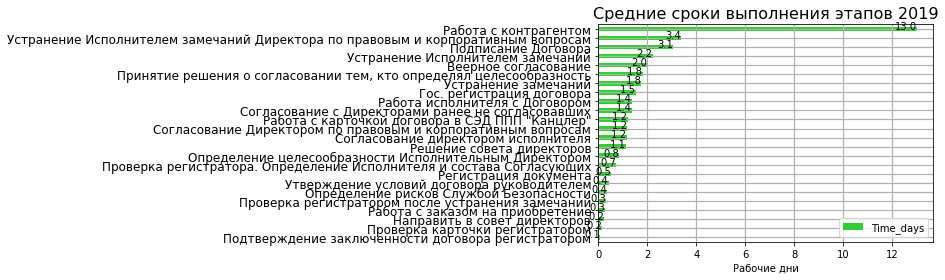

<Figure size 1120x1120 with 0 Axes>

In [17]:

concated_step = concated.groupby(['Step']).mean()['Time_days'].reset_index()
concated_step.sort_values('Time_days', inplace = True)
concated_step.reset_index(inplace = True)
concated_step.plot('Step', 'Time_days', kind = 'barh', color = 'limegreen')
for x, y, tex in zip(concated_step['Time_days'], 
                     concated_step.index, 
                     concated_step['Time_days']):
    t = plt.text(x, y, round(tex, 1), horizontalalignment='right', 
                 verticalalignment='baseline')
plt.yticks(concated_step.index, concated_step.Step, fontsize=12)
plt.grid(which='major', linewidth=1.2) 
plt.xlabel('Рабочие дни')
plt.ylabel('')
plt.title('Средние сроки выполнения этапов 2019', fontsize=16)
plt.figure(figsize=(14,14), dpi= 80)


#### Сформируем агрегированный по номеру договора датасет. Цель получить длительность каждого договора

In [18]:
df_agg = concated[['ID contract', 'ZNP', 'Partner', 'Profile', 'Description',
                  'Version', 'Oracle', 'Author', 'Department', 'Department_1', 'Direction', 'Month']]

Суммируем длительность этапов для каждого договора

In [19]:
df_amount_days = concated.groupby(['ID contract']).sum()['Time_days'].reset_index()

In [20]:
df_agg_c = df_amount_days.merge(df_agg, on = 'ID contract', how = 'left')

In [21]:
df_agg_c.drop_duplicates(subset = 'ID contract', keep = 'first', inplace = True)

Проверили кол-во записей в датафрейме. Оно равно кол-ву уникальных договоров в неагрегированном датафрейме

In [22]:
df_agg_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7252 entries, 0 to 86665
Data columns (total 13 columns):
ID contract     7252 non-null int64
Time_days       7252 non-null int64
ZNP             1498 non-null float64
Partner         7252 non-null object
Profile         7235 non-null object
Description     6473 non-null object
Version         7252 non-null int64
Oracle          7252 non-null object
Author          7219 non-null object
Department      5543 non-null object
Department_1    7139 non-null object
Direction       7204 non-null object
Month           7252 non-null object
dtypes: float64(1), int64(3), object(9)
memory usage: 793.2+ KB


In [23]:
def missingdata(data):
    '''
    считаем кол-во и долю пропущеных значений
    '''
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]
    return ms

In [24]:
missingdata(df_agg_c)

,Total,Percent
ZNP,5754,79.343629
Department,1709,23.565913
Description,779,10.741864
Department_1,113,1.558191
Direction,48,0.661886
Author,33,0.455047
Profile,17,0.234418


In [25]:
df_agg_c[(df_agg_c['Department'].isnull())].groupby(['Department_1','Author']).nunique()['ID contract']

Department_1                                                 Author                         
Административное управление                                  Антипина Юлия Владимировна           1
                                                             Благовисная Наталия Игоревна         2
                                                             Зуев Кирилл Сергеевич               60
                                                             Кокшарова Наталья Александровна      3
                                                             Москаленко Светлана Анатольевна      1
                                                             Мотрич Оксана Борисовна             14
                                                             Норина Вера Александровна            2
                                                             Панарина Светлана Викторовна         1
                                                             Родионова Евгения Владиславовна      1
       

Пропуски допустимы, т.к. некоторые часть работников является сотрудниками управлений и не входят в отдел

In [26]:
df_agg_c[(df_agg_c['Department_1'].isnull())].groupby(['Author']).nunique()['ID contract']

Author
Лаптева Анна Рудольфовна        1
Саишева Ульяна Фанилевна        1
Шевелева Оксана Геннадьевна    76
Шупеник Алена Викторовна        2
Name: ID contract, dtype: int64

Ошибка в синхронизации справочников ШР из двух систем

In [27]:
df_agg_c[(df_agg_c['Direction'].isnull())].groupby(['Author']).nunique()['ID contract']

Author
Братчиков Максим Юрьевич        7
Киселев Владимир Геннадьевич    4
Логвин Леонид Александрович     1
Саишева Ульяна Фанилевна        1
Шупеник Алена Викторовна        2
Name: ID contract, dtype: int64

По Шупеник - ошибка (в СЭД). По остальным - работники службы маркетинга. Проблема в СЭД - справочники ШР Oracle и СЭД не синхронизированы

In [28]:
df_agg_c[(df_agg_c['Author'].isnull())]

,ID contract,Time_days,ZNP,Partner,Profile,Description,Version,Oracle,Author,Department,Department_1,Direction,Month
520,13082729,1,NaN,"ООО ""УРАЛКАЛИЙ ТРЕЙДИНГ""",Сбыт продукции на внешний рынок и страны СНГ,Дополнение №7,1,Да,NaN,NaN,NaN,NaN,01.03.2019
2766,13087829,141,NaN,"ООО ""УРАЛКАЛИЙ ТРЕЙДИНГ""",Сбыт продукции на внешний рынок и страны СНГ,Дополнение №9,1,Да,NaN,NaN,NaN,NaN,01.06.2019
5652,13088943,29,NaN,"ФГБОУ ВО ""ПЕРМСКИЙ НАЦИОНАЛЬНЫЙ ИССЛЕДОВАТЕЛЬС...",Прочее оказание услуг,NaN,1,Да,NaN,NaN,NaN,NaN,01.01.2019
10200,13089756,28,NaN,"ООО ""АНТАРЕС""",Прочее оказание услуг,"Работы по техническому обслуживанию: проверке,...",1,Да,NaN,NaN,NaN,NaN,01.02.2019
15427,13090658,13,NaN,"ООО ""ПРОИЗВОДСТВЕННОЕ ОБЪЕДИНЕНИЕ ""ЭНЕРГОКОМПЛ...",Приобретение ТМЦ и иного имущества (в том числ...,Спецификация №1 к договору поставки №10386/201...,1,Да,NaN,NaN,NaN,NaN,01.01.2019
17461,13090925,22,NaN,"ООО ""ПРОИЗВОДСТВЕННОЕ ОБЪЕДИНЕНИЕ ""ЭНЕРГОКОМПЛ...",Приобретение ТМЦ и иного имущества (в том числ...,Спецификация №2 к договору поставки №10386/201...,1,Да,NaN,NaN,NaN,NaN,01.02.2019
23386,13091929,5,NaN,"ООО ""ЮНИТ ТРЕЙД""",Приобретение ТМЦ и иного имущества (в том числ...,Договор поставки 1012/2019/45,1,Да,NaN,NaN,NaN,NaN,01.02.2019
38011,13094787,34,NaN,"ООО ""ЭНЕРГИЯ"" 92032","Договоры, заключаемые по результатам конкурент...","договор поставки №3130/2019/45, Оборудование, ...",1,Да,NaN,NaN,NaN,NaN,01.07.2019
40521,13095335,16,NaN,UNITED FERTILIZERS COMPANY LIMITED,Сбыт продукции на внешний рынок и страны СНГ,ДОГОВОР № UFCL-UK-2019-1,1,Да,NaN,NaN,NaN,NaN,01.05.2019
42445,13095728,52,NaN,"ООО ""ТРАКРЕСУРС-РЕГИОН""","Договоры, заключаемые по результатам конкурент...","договор поставки № 3849/2019/45, Оборудование,...",1,Да,NaN,NaN,NaN,NaN,01.07.2019


In [29]:
df_agg_c[(df_agg_c['Profile'].isnull())].groupby(['Partner']).nunique()['ID contract'].sort_values(ascending=False)

Partner
ООО ТОРГОВЫЙ ДОМ "БАШХИМ"                   11
ООО "УРАЛКАЛИЙ ТРЕЙДИНГ"                     2
ЯЯТЕСТОВЫХ ТЕСТ ТЕСТОВИЧ                     1
ОАО "КОПЕЙСКИЙ МАШИНОСТРОИТЕЛЬНЫЙ ЗАВОД"     1
АО "РУССКИЙ ХРОМ 1915"                       1
АО "МИНУДОБРЕНИЯ"6292                        1
Name: ID contract, dtype: int64

In [30]:
df_agg_c[(df_agg_c['Partner'] == 'ЯЯТЕСТОВЫХ ТЕСТ ТЕСТОВИЧ')]

,ID contract,Time_days,ZNP,Partner,Profile,Description,Version,Oracle,Author,Department,Department_1,Direction,Month
86665,1234567899876543211,224,NaN,ЯЯТЕСТОВЫХ ТЕСТ ТЕСТОВИЧ,NaN,NaN,1,Да,Снегирев Павел Эдуардович,Отдел прикладных информационных систем,Управление информационных систем,Дирекция по информационным технологиям,01.07.2019


Продуктив содержит записи тестовых договоров

In [31]:
# удаляем тестовый договор
df_agg_c.drop([86665], inplace=True)

In [32]:
df_agg_c[(df_agg_c['Profile'].isnull())].groupby(['Description']).nunique()['ID contract'].sort_values(ascending=False)

Description
Специцикация № 48 к договору № 2552/2014/МТО на сумму 339760 без НДС                    1
Спецификация № 49 к договору № 2552/2014/МТО на сумму 1 225 728,00 руб. с НДС           1
Спецификация № 47 к договору № 2552/2014/МТО на сумму 1360480,00 руб без НДС            1
Спецификация № 45 к договору № 2552/2014/МТО на сумму 2 100 624,00 руб. с НДС           1
Спецификация № 43 к договору № 2552/2014/МТО на сумму  1 262 016,00 руб с НДС           1
Спецификация № 41 к договору № 2552/2014/МТО на сумму 798 528,00 руб. с учетм НДС.      1
Спецификация № 39 к договору № 2552/2014/МТО на сумму 1 199 088,00 руб. с учетом НДС    1
Приложение №53                                                                          1
Приложение №51                                                                          1
Приложение №50                                                                          1
Приложение № 46 к договору № 2552/2014/МТО на сумму 2 448 864,00 руб. с учетом НДС      

In [33]:
df_agg_c.groupby(['Oracle']).count()['ID contract']

Oracle
Да    7251
Name: ID contract, dtype: int64

In [34]:
# удаляем неинформативные столбцы из датасета
# Oracle - только 1 значение
# Version - номер версии этапа не известен для нового договора

drop_column_1 = ['Oracle', 'Version']
df_agg_c.drop(drop_column_1, axis=1, inplace = True)

Заполняем пропущенные значения:
    ZNP - заполняем пропуски 0, и делаем бинарный признак

In [35]:
df_agg_c['ZNP'].fillna(0, inplace = True)

In [36]:
def znp_bin(d1):
    if d1 == 0:
        return 0
    else:
        return 1

In [37]:
df_agg_c['ZNP_bin'] = df_agg_c['ZNP'].apply(znp_bin)

In [38]:
df_agg_c.drop('ZNP', axis=1, inplace = True)

    Для отдела - пропуски заполнем 0 и делаем бинарный признак (работник отдела или нет)

In [39]:
df_agg_c['Department'].fillna(0, inplace = True)

In [40]:
def department_bin(d2):
    if d2 == 0:
        return 0
    else:
        return 1

In [41]:
df_agg_c['Department_bin'] = df_agg_c['Department'].apply(department_bin)

    для Описания - заполняем 0 и делаем бинарный признак, основный признак удаляем

In [42]:
df_agg_c['Description'].fillna(0, inplace = True)

In [43]:
def description_bin(d3):
    if d3 == 0:
        return 0
    else:
        return 1

In [44]:
df_agg_c['Description_bin'] = df_agg_c['Description'].apply(description_bin)

In [45]:
df_agg_c.drop('Description', axis=1, inplace = True)

    для пропусков в Дирекции заполняем правильными значениями

In [46]:
def direction(d4):
    if d4 == 'Братчиков Максим Юрьевич':
        return 'Служба маркетинга'
    elif d4 == 'Киселев Владимир Геннадьевич':
        return 'Служба маркетинга'
    elif d4 == 'Логвин Леонид Александрович':
        return 'Служба маркетинга'
    elif d4 == 'Шупеник Алена Викторовна':
        return 'Дирекция по правовым и корпоративным вопросам'
    elif d4 == 'Саишева Ульяна Фанилевна':
        return 'Дирекция по закупкам'
    else:
        return 'error direction'

In [47]:
df_agg_c['Direction'].fillna(df_agg_c['Author'].apply(direction), inplace = True)

In [48]:
df_agg_c.groupby(['Direction']).count()['ID contract']

Direction
error direction                                                                    33
Дирекция по безопасности                                                          116
Дирекция по внутреннему аудиту                                                      8
Дирекция по закупкам                                                             2742
Дирекция по информационным технологиям                                            229
Дирекция по капитальному строительству                                            624
Дирекция по недропользованию                                                      249
Дирекция по охране труда, промышленной безопасности и охране окружающей среды     101
Дирекция по персоналу                                                             896
Дирекция по правовым и корпоративным вопросам                                     595
Дирекция по продажам на внутреннем рынке                                           76
Дирекция по экономике и финансам            

    пропуски для Автора заполняем значением Аноним

In [49]:
df_agg_c['Author'].fillna('Anonym', inplace = True)

        пропуски в Профайле заполняем значением Дополнение к осн. договору

In [50]:
df_agg_c['Profile'].fillna('Дополнения к осн. договору', inplace = True)

In [51]:
missingdata(df_agg_c)

,Total,Percent
Department_1,113,1.558406


In [52]:
df_agg_c.groupby(['Department_1']).count()['ID contract'].sort_values(ascending = False)

Department_1
Управление                                                                                 3528
Договорное управление                                                                       479
Управление подбора и развития персонала                                                     476
Управление по ремонту и эксплуатации зданий и сооружений                                    281
Управление по коммерции                                                                     280
Управление главного энергетика                                                              256
Управление по железнодорожному транспорту                                                   234
Социальное управление                                                                       226
Горное управление                                                                           188
Управление главного механика                                                                186
Административное управление

In [53]:
# удаляем поле с названием управления, ценности нет из-за ошибки в синхронизации справочников ШР
df_agg_c.drop('Department_1', axis=1, inplace = True)

Создаем признак со длительностью этапа Работа с заказом на приобретение. Данный этап выполняется в Oracle до СЭД

In [54]:
df_agg_oracle = concated[concated['Step'] == 'Работа с заказом на приобретение'].groupby(['ID contract']).sum()['Time_days'].reset_index()

In [55]:
df_agg_oracle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1497 entries, 0 to 1496
Data columns (total 2 columns):
ID contract    1497 non-null int64
Time_days      1497 non-null int64
dtypes: int64(2)
memory usage: 23.5 KB


In [56]:
df_agg_c = df_agg_c.merge(df_agg_oracle, on = 'ID contract', how = 'left')

In [57]:
df_agg_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7251 entries, 0 to 7250
Data columns (total 12 columns):
ID contract        7251 non-null int64
Time_days_x        7251 non-null int64
Partner            7251 non-null object
Profile            7251 non-null object
Author             7251 non-null object
Department         7251 non-null object
Direction          7251 non-null object
Month              7251 non-null object
ZNP_bin            7251 non-null int64
Department_bin     7251 non-null int64
Description_bin    7251 non-null int64
Time_days_y        1497 non-null float64
dtypes: float64(1), int64(5), object(6)
memory usage: 736.4+ KB


In [58]:
df_agg_c['Time_days_y'].describe()

count    1497.000000
mean        0.276553
std         1.431013
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        23.000000
Name: Time_days_y, dtype: float64

In [59]:
df_agg_c['Time_days_y'].fillna(-1, inplace = True)

Признак Кол-во этапов визирования для каждого договора

In [60]:
df_agg_step = concated.groupby(['ID contract']).count()['Step'].reset_index()

In [61]:
df_agg_step.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7252 entries, 0 to 7251
Data columns (total 2 columns):
ID contract    7252 non-null int64
Step           7252 non-null int64
dtypes: int64(2)
memory usage: 113.4 KB


In [62]:
df_agg_c = df_agg_c.merge(df_agg_step, on = 'ID contract', how = 'left')

In [63]:
df_agg_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7251 entries, 0 to 7250
Data columns (total 13 columns):
ID contract        7251 non-null int64
Time_days_x        7251 non-null int64
Partner            7251 non-null object
Profile            7251 non-null object
Author             7251 non-null object
Department         7251 non-null object
Direction          7251 non-null object
Month              7251 non-null object
ZNP_bin            7251 non-null int64
Department_bin     7251 non-null int64
Description_bin    7251 non-null int64
Time_days_y        7251 non-null float64
Step               7251 non-null int64
dtypes: float64(1), int64(6), object(6)
memory usage: 793.1+ KB


In [64]:
type(df_agg_c['Month'][1])

str

In [65]:
from datetime import datetime

In [66]:
def for_date(d5):
    return datetime.strptime(d5, '%d.%m.%Y' )

In [67]:
df_agg_c['Date'] = df_agg_c['Month'].apply(for_date)

In [68]:
type(df_agg_c['Date'][1])

pandas._libs.tslibs.timestamps.Timestamp

In [69]:
def for_month(d6):
    return datetime.strftime(d6, '%B' )

In [70]:
df_agg_c['Month_new'] = df_agg_c['Date'].apply(for_month)

In [71]:
df_agg_c['Month_new'].unique()

array(['September', 'July', 'March', 'February', 'May', 'June', 'January',
       'April', 'December', 'November', 'October', 'August'], dtype=object)

In [72]:
def for_month_number(d7):
    return d7.month

In [73]:
df_agg_c['Month_number'] = df_agg_c['Date'].apply(for_month_number)

In [74]:
df_agg_c['Month_number'].unique()

array([ 9,  7,  3,  2,  5,  6,  1,  4, 12, 11, 10,  8], dtype=int64)

#### Применим статистические методы для определения влияющих признаков (описательная статистика и критерий Стьюдента)

Распределение Time_days_x (срок заключения договора) можно отнести к лог-нормальному

In [75]:
df_agg_c['Time_days_x'].describe()

count    7251.000000
mean       25.590953
std        24.282228
min         0.000000
25%        13.000000
50%        21.000000
75%        31.000000
max       961.000000
Name: Time_days_x, dtype: float64

In [76]:
import seaborn as sns

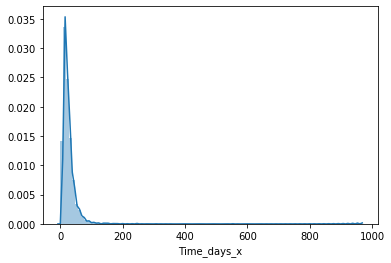

In [77]:
sns.distplot(df_agg_c.Time_days_x, bins = 100)

Медиана составляет 21 рд, среднее значение = 26 рд.
Значение по медиане совпадает с регламентным = 22 рд (11 рд на внутреннем согласовании + 11 рд на согласовании у к/а).

Возможно в датасете есть выбросы, максимальный срок заключения равен 961 и договоры с нулевым сроком заключения.

In [78]:
df_agg_c[df_agg_c['Time_days_x'] == 961]

,ID contract,Time_days_x,Partner,Profile,Author,Department,Direction,Month,ZNP_bin,Department_bin,Description_bin,Time_days_y,Step,Date,Month_new,Month_number
0,11905595,961,"ПАО ""СБЕРБАНК РОССИИ"" Г. МОСКВА",Кредитные договоры и договоры займа,Фадеева Елена Анатольевна,Отдел кредитования и оперативного финансового ...,Дирекция по экономике и финансам,01.09.2019,0,1,0,-1.0,5,2019-09-01,September,9


In [79]:
concated[concated['ID contract'] == 11905595]

,ID contract,ZNP,Reg number,Partner,Description,Step,Version,Date start,Date finish,Oracle,Author,Department,Department_1,Direction,Time_days,Profile,Month
0,11905595,NaN,6942/2013/,"ПАО ""СБЕРБАНК РОССИИ"" Г. МОСКВА",NaN,"Работа с карточкой договора в СЭД ППП ""Канцлер""",1,22-ОКТ-15,12-СЕН-19,Да,Фадеева Елена Анатольевна,Отдел кредитования и оперативного финансового ...,Управление финансов,Дирекция по экономике и финансам,959,Кредитные договоры и договоры займа,01.09.2019
1,11905595,NaN,6942/2013/,"ПАО ""СБЕРБАНК РОССИИ"" Г. МОСКВА",NaN,Проверка регистратора. Определение Исполнителя...,1,12-СЕН-19,13-СЕН-19,Да,Фадеева Елена Анатольевна,Отдел кредитования и оперативного финансового ...,Управление финансов,Дирекция по экономике и финансам,1,Кредитные договоры и договоры займа,01.09.2019
2,11905595,NaN,6942/2013/,"ПАО ""СБЕРБАНК РОССИИ"" Г. МОСКВА",NaN,Проверка регистратора. Определение Исполнителя...,2,13-СЕН-19,16-СЕН-19,Да,Фадеева Елена Анатольевна,Отдел кредитования и оперативного финансового ...,Управление финансов,Дирекция по экономике и финансам,1,Кредитные договоры и договоры займа,01.09.2019
3,11905595,NaN,6942/2013/,"ПАО ""СБЕРБАНК РОССИИ"" Г. МОСКВА",NaN,Подтверждение заключенности договора регистрат...,1,25-СЕН-19,25-СЕН-19,Да,Фадеева Елена Анатольевна,Отдел кредитования и оперативного финансового ...,Управление финансов,Дирекция по экономике и финансам,0,Кредитные договоры и договоры займа,01.09.2019
4,11905595,NaN,6942/2013/,"ПАО ""СБЕРБАНК РОССИИ"" Г. МОСКВА",NaN,Устранение замечаний,1,13-СЕН-19,13-СЕН-19,Да,Фадеева Елена Анатольевна,Отдел кредитования и оперативного финансового ...,Управление финансов,Дирекция по экономике и финансам,0,Кредитные договоры и договоры займа,01.09.2019


Этап Работа в СЭД имеет длительность 959. Уточнили, что дата старта пришла из архивной системы визирования договоров, используемой ранее, так выполнена настройка при создании доп. соглашений к основному договору - очень спорное решение. К удалению из основного датасета

In [80]:
df_agg_c.drop([0], inplace=True)

In [81]:
df_agg_c[df_agg_c['Time_days_x'] > 31].groupby(['Time_days_x']).count()['ID contract'].sort_values(ascending = False).head(25)

Time_days_x
32    110
33     98
34     83
37     82
35     81
41     76
36     76
40     68
39     67
38     66
45     60
43     51
44     47
47     45
46     44
42     40
49     38
54     31
50     28
52     27
53     26
51     26
48     26
58     25
56     22
Name: ID contract, dtype: int64

In [82]:
df_agg_c[df_agg_c['Time_days_x'] > 75].sort_values('Time_days_x', ascending = False).head(10)

,ID contract,Time_days_x,Partner,Profile,Author,Department,Direction,Month,ZNP_bin,Department_bin,Description_bin,Time_days_y,Step,Date,Month_new,Month_number
2,13063807,554,"АО ""ВАГОННАЯ РЕМОНТНАЯ КОМПАНИЯ-1""","Ремонт транспортных средств (автотранспорта,ж/...",Тудвасева Елена Михайловна,Отдел вагонного хозяйства,Техническая дирекция,01.07.2019,1,1,1,1.0,28,2019-07-01,July,7
8,13079654,303,"ООО ""ТЕХНО ТОР""",Приобретение ТМЦ и иного имущества (в том числ...,Широков Сергей Владимирович,"Отдел по закупке горно-шахтного, конвейерного ...",Дирекция по закупкам,01.07.2019,0,1,1,-1.0,13,2019-07-01,July,7
66,13086385,286,НИКОНОВ ИЛЬЯ НИКОЛАЕВИЧ,Прочие,Лаздовская Ольга Евгеньевна,0,Дирекция по персоналу,01.12.2019,0,0,1,-1.0,12,2019-12-01,December,12
69,13086498,271,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""РИВА...",Прочее оказание услуг,Пологова Татьяна Валерьевна,Отдел корпоративных отношений,Дирекция по правовым и корпоративным вопросам,01.11.2019,1,1,0,0.0,23,2019-11-01,November,11
261,13088671,248,"ООО ""НАУЧНО-ВНЕДРЕНЧЕСКОЕ УПРАВЛЕНИЕ""","Обеспечение э/энергией,паром,водой,прием сточн...",Халилуллова Юлия Ниловна,"Отдел планирования, нормирования и распределен...",Техническая дирекция,01.11.2019,0,1,1,-1.0,9,2019-11-01,November,11
260,13088669,248,"ООО ""НАУЧНО-ВНЕДРЕНЧЕСКОЕ УПРАВЛЕНИЕ""","Обеспечение э/энергией,паром,водой,прием сточн...",Халилуллова Юлия Ниловна,"Отдел планирования, нормирования и распределен...",Техническая дирекция,01.11.2019,0,1,1,-1.0,9,2019-11-01,November,11
670,13089890,246,"АО ""МИНУДОБРЕНИЯ""6292",Сбыт продукции на внутренний рынок,Матвеева Оксана Анатольевна,Отдел по оформлению и продажам на внутреннем р...,Техническая дирекция,01.12.2019,0,1,0,-1.0,11,2019-12-01,December,12
71,13086533,227,ПАНЧЕНКОВА ЕЛЕНА ВЛАДИМИРОВНА,Прочие,Лаздовская Ольга Евгеньевна,0,Дирекция по персоналу,01.09.2019,0,0,1,-1.0,18,2019-09-01,September,9
1006,13090637,211,"ООО ""ЭЛСИ ИНТЕГРАЦИЯ""",Прочее оказание услуг,Некрасова Екатерина Борисовна,0,Дирекция по информационным технологиям,01.11.2019,0,0,0,-1.0,12,2019-11-01,November,11
29,13083582,202,ЕВРАЗСТАНДАРТ,Прочее оказание услуг,Москаленко Светлана Анатольевна,0,Дирекция по персоналу,01.05.2019,0,0,1,-1.0,37,2019-05-01,May,5


Проверили подряд 10 договоров с максимальными сроками заключения, это не ошибки, а действительные сроки заключения.

In [83]:
concated[concated['ID contract'] == 13063807]

,ID contract,ZNP,Reg number,Partner,Description,Step,Version,Date start,Date finish,Oracle,Author,Department,Department_1,Direction,Time_days,Profile,Month
0,13063807,119280.0,1073/2017/42,"АО ""ВАГОННАЯ РЕМОНТНАЯ КОМПАНИЯ-1""",Договор на выполнение текущего отцепочного рем...,Работа с заказом на приобретение,1,01-МАР-17,02-МАР-17,Да,Тудвасева Елена Михайловна,Отдел вагонного хозяйства,Управление по железнодорожному транспорту,Техническая дирекция,1,"Ремонт транспортных средств (автотранспорта,ж/...",01.07.2019
1,13063807,119280.0,1073/2017/42,"АО ""ВАГОННАЯ РЕМОНТНАЯ КОМПАНИЯ-1""",Договор на выполнение текущего отцепочного рем...,"Работа с карточкой договора в СЭД ППП ""Канцлер""",1,02-МАР-17,02-МАР-17,Да,Тудвасева Елена Михайловна,Отдел вагонного хозяйства,Управление по железнодорожному транспорту,Техническая дирекция,0,"Ремонт транспортных средств (автотранспорта,ж/...",01.07.2019
2,13063807,119280.0,1073/2017/42,"АО ""ВАГОННАЯ РЕМОНТНАЯ КОМПАНИЯ-1""",Договор на выполнение текущего отцепочного рем...,Проверка регистратора. Определение Исполнителя...,1,02-МАР-17,02-МАР-17,Да,Тудвасева Елена Михайловна,Отдел вагонного хозяйства,Управление по железнодорожному транспорту,Техническая дирекция,0,"Ремонт транспортных средств (автотранспорта,ж/...",01.07.2019
3,13063807,119280.0,1073/2017/42,"АО ""ВАГОННАЯ РЕМОНТНАЯ КОМПАНИЯ-1""",Договор на выполнение текущего отцепочного рем...,Проверка регистратора. Определение Исполнителя...,2,13-МАР-17,13-МАР-17,Да,Тудвасева Елена Михайловна,Отдел вагонного хозяйства,Управление по железнодорожному транспорту,Техническая дирекция,0,"Ремонт транспортных средств (автотранспорта,ж/...",01.07.2019
4,13063807,119280.0,1073/2017/42,"АО ""ВАГОННАЯ РЕМОНТНАЯ КОМПАНИЯ-1""",Договор на выполнение текущего отцепочного рем...,Регистрация документа,1,13-МАР-17,13-МАР-17,Да,Тудвасева Елена Михайловна,Отдел вагонного хозяйства,Управление по железнодорожному транспорту,Техническая дирекция,0,"Ремонт транспортных средств (автотранспорта,ж/...",01.07.2019
5,13063807,119280.0,1073/2017/42,"АО ""ВАГОННАЯ РЕМОНТНАЯ КОМПАНИЯ-1""",Договор на выполнение текущего отцепочного рем...,Утверждение условий договора руководителем,1,13-МАР-17,13-МАР-17,Да,Тудвасева Елена Михайловна,Отдел вагонного хозяйства,Управление по железнодорожному транспорту,Техническая дирекция,0,"Ремонт транспортных средств (автотранспорта,ж/...",01.07.2019
6,13063807,119280.0,1073/2017/42,"АО ""ВАГОННАЯ РЕМОНТНАЯ КОМПАНИЯ-1""",Договор на выполнение текущего отцепочного рем...,Определение целесообразности Исполнительным Ди...,1,13-МАР-17,13-МАР-17,Да,Тудвасева Елена Михайловна,Отдел вагонного хозяйства,Управление по железнодорожному транспорту,Техническая дирекция,0,"Ремонт транспортных средств (автотранспорта,ж/...",01.07.2019
7,13063807,119280.0,1073/2017/42,"АО ""ВАГОННАЯ РЕМОНТНАЯ КОМПАНИЯ-1""",Договор на выполнение текущего отцепочного рем...,Веерное согласование,1,13-МАР-17,20-МАР-17,Да,Тудвасева Елена Михайловна,Отдел вагонного хозяйства,Управление по железнодорожному транспорту,Техническая дирекция,5,"Ремонт транспортных средств (автотранспорта,ж/...",01.07.2019
8,13063807,119280.0,1073/2017/42,"АО ""ВАГОННАЯ РЕМОНТНАЯ КОМПАНИЯ-1""",Договор на выполнение текущего отцепочного рем...,Веерное согласование,2,24-АВГ-18,03-СЕН-18,Да,Тудвасева Елена Михайловна,Отдел вагонного хозяйства,Управление по железнодорожному транспорту,Техническая дирекция,6,"Ремонт транспортных средств (автотранспорта,ж/...",01.07.2019
9,13063807,119280.0,1073/2017/42,"АО ""ВАГОННАЯ РЕМОНТНАЯ КОМПАНИЯ-1""",Договор на выполнение текущего отцепочного рем...,Веерное согласование,3,27-НОЯ-18,03-ДЕК-18,Да,Тудвасева Елена Михайловна,Отдел вагонного хозяйства,Управление по железнодорожному транспорту,Техническая дирекция,4,"Ремонт транспортных средств (автотранспорта,ж/...",01.07.2019


In [84]:
# договоры со сроком заключения меньше 3 рд
df_agg_c[df_agg_c['Time_days_x'] < 3].groupby(['Profile']).count()['ID contract'].sort_values(ascending=False)

Profile
Продажа путевок на санаторно-курортное лечение в подразделении "Санаторий-профилакторий"                                                     99
Прочее оказание услуг                                                                                                                        42
Прочие                                                                                                                                       26
Приобретение ТМЦ и иного имущества (в том числе автотранспорта) на внутреннем и внешнем рынке                                                11
Сбыт продукции на внутренний рынок                                                                                                           10
Договоры на рекламу                                                                                                                          10
Кредитные договоры и договоры займа                                                                                             

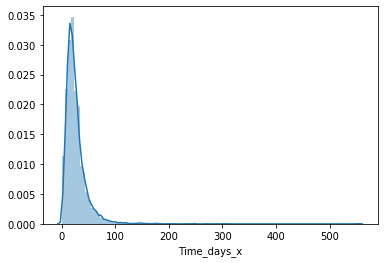

In [85]:
sns.distplot(df_agg_c.Time_days_x, bins = 100)

In [86]:
df_agg_c.describe()['Time_days_x']

count    7250.000000
mean       25.461931
std        21.656092
min         0.000000
25%        13.000000
50%        21.000000
75%        31.000000
max       554.000000
Name: Time_days_x, dtype: float64

Проанализируем выбросы

<Figure size 1120x1120 with 0 Axes>

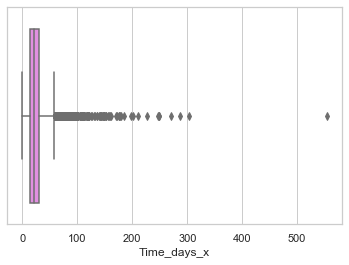

<Figure size 1120x1120 with 0 Axes>

In [87]:
sns.set(style="whitegrid")
sns.boxplot(df_agg_c.Time_days_x, color='violet')
plt.figure(figsize=(14,14), dpi= 80)

In [88]:
df_agg_c_outline = df_agg_c[df_agg_c['Time_days_x'] > 63]

In [89]:
df_agg_c_outline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 2 to 6010
Data columns (total 16 columns):
ID contract        317 non-null int64
Time_days_x        317 non-null int64
Partner            317 non-null object
Profile            317 non-null object
Author             317 non-null object
Department         317 non-null object
Direction          317 non-null object
Month              317 non-null object
ZNP_bin            317 non-null int64
Department_bin     317 non-null int64
Description_bin    317 non-null int64
Time_days_y        317 non-null float64
Step               317 non-null int64
Date               317 non-null datetime64[ns]
Month_new          317 non-null object
Month_number       317 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(7), object(7)
memory usage: 42.1+ KB


In [90]:
df_agg_c_inline = df_agg_c[df_agg_c['Time_days_x'] <= 63]

Выгрузки для анализа выбросов

In [91]:
#df_agg_c_outline.groupby(['Partner']).count()['ID contract'].sort_values(ascending = False).to_excel('outline_partner.xlsx')
#df_agg_c_outline.groupby(['Profile']).count()['ID contract'].sort_values(ascending = False).to_excel('outline_profile.xlsx')
#df_agg_c_outline.groupby(['Author']).count()['ID contract'].sort_values(ascending = False).to_excel('outline_author.xlsx')
#df_agg_c_outline.groupby(['Department']).count()['ID contract'].sort_values(ascending = False).to_excel('outline_department.xlsx')
#df_agg_c_outline.groupby(['Direction']).count()['ID contract'].sort_values(ascending = False).to_excel('outline_direction.xlsx')
#df_agg_c_outline.groupby(['Month_new']).count()['ID contract'].sort_values(ascending = False).to_excel('outline_month.xlsx')

In [92]:
#df_agg_c_inline.groupby(['Partner']).count()['ID contract'].sort_values(ascending = False).to_excel('inline_partner.xlsx')
#df_agg_c_inline.groupby(['Profile']).count()['ID contract'].sort_values(ascending = False).to_excel('inline_profile.xlsx')
#df_agg_c_inline.groupby(['Author']).count()['ID contract'].sort_values(ascending = False).to_excel('inline_author.xlsx')
#df_agg_c_inline.groupby(['Department']).count()['ID contract'].sort_values(ascending = False).to_excel('inline_department.xlsx')
#df_agg_c_inline.groupby(['Direction']).count()['ID contract'].sort_values(ascending = False).to_excel('inline_direction.xlsx')
#df_agg_c_inline.groupby(['Month_new']).count()['ID contract'].sort_values(ascending = False).to_excel('inline_month.xlsx')

##### Описательная статистика 

1. Признак Контрагенты

In [93]:
df_agg_c.groupby(['Partner']).agg(['count', 'mean', 'median', 'min', 'max', 'std'])['Time_days_x'].sort_values('count', ascending = False).head(40)

,count,mean,median,min,max,std
Partner,,,,,,
"АО ""ВНИИ ГАЛУРГИИ """,370,23.689189,22.0,3,96,9.942280
"ООО ""УРАЛКАЛИЙ-РЕМОНТ""",176,23.096591,22.0,5,72,10.248723
"ООО ""СМТ ""БШСУ""",164,28.182927,23.5,5,114,16.360680
"ФГБОУ ВО ""УРАЛЬСКИЙ ГОСУДАРСТВЕННЫЙ ГОРНЫЙ УНИВЕРСИТЕТ""",75,25.253333,18.0,7,60,14.348080
"ООО ""КОМПАНИЯ ДЭП""",66,15.090909,13.5,5,44,7.120344
"ФГБОУ ВО ""ПЕРМСКИЙ НАЦИОНАЛЬНЫЙ ИССЛЕДОВАТЕЛЬСКИЙ ПОЛИТЕХНИЧЕСКИЙ УНИВЕРСИТЕТ"", БФ",65,24.630769,22.0,11,60,8.866315
"ООО ""АВТОТРАНСКАЛИЙ""",65,17.353846,16.0,4,43,7.896658
"ПФИЦ УрО РАН, филиал ""ГИ УрО РАН""",64,18.656250,17.0,8,43,7.511301
"МИНИСТЕРСТВО ПРИРОДНЫХ РЕСУРСОВ, ЛЕСНОГО ХОЗЯЙСТВА И ЭКОЛОГИИ ПЕРМСКОГО КРАЯ",57,33.982456,26.0,6,112,26.524578


In [94]:
df_agg_c.groupby(['Partner']).agg(['count', 'mean', 'median', 'min', 'max', 'std'])['Time_days_x'].sort_values('mean', ascending = False).head(10)

,count,mean,median,min,max,std
Partner,,,,,,
"АО ""ВАГОННАЯ РЕМОНТНАЯ КОМПАНИЯ-1""",1,554.0,554.0,554,554,NaN
НИКОНОВ ИЛЬЯ НИКОЛАЕВИЧ,1,286.0,286.0,286,286,NaN
"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""РИВАЙВЭЛ КЭПИТАЛ""",1,271.0,271.0,271,271,NaN
ПАНЧЕНКОВА ЕЛЕНА ВЛАДИМИРОВНА,1,227.0,227.0,227,227,NaN
ЕВРАЗСТАНДАРТ,1,202.0,202.0,202,202,NaN
"АО ""ИНТЕРФАКС""",1,197.0,197.0,197,197,NaN
"ООО ""ГЕОСЪЕМКА""",1,185.0,185.0,185,185,NaN
T MACHINERY A.S.,1,160.0,160.0,160,160,NaN
"ООО ""РЕЗЕРВУАРНЫЙ МЕТАЛЛИЧЕСКИЙ ЗАВОД""",1,152.0,152.0,152,152,NaN


In [95]:
partner_std=df_agg_c.groupby(['Partner']).agg(['count', 'mean', 'median', 'min', 'max', 'std'])['Time_days_x'].reset_index()

In [96]:
partner_std['std'].mean()

12.342617742608784

In [320]:
partner_std['mean'].max() - partner_std['mean'].min()

554.0

In [97]:
plot_1 = df_agg_c.groupby(['Partner']).agg(['count', 'mean'])['Time_days_x'].reset_index()

In [326]:
plot_1.corr()

,count,mean
count,1.000000,-0.002483
mean,-0.002483,1.000000


нет зависимости между (линейной корреляции) между количеством договоров с к/а и средним (медианным) сроком заключения договора

In [101]:
df_agg_c['Partner'].value_counts(normalize = True).sort_values(ascending = False)

АО "ВНИИ ГАЛУРГИИ "                                        0.051034
ООО "УРАЛКАЛИЙ-РЕМОНТ"                                     0.024276
ООО "СМТ "БШСУ"                                            0.022621
ФГБОУ ВО "УРАЛЬСКИЙ ГОСУДАРСТВЕННЫЙ ГОРНЫЙ УНИВЕРСИТЕТ"    0.010345
ООО "КОМПАНИЯ ДЭП"                                         0.009103
                                                             ...   
ООО "ЭНЕРГОАВТОМАТИКА"                                     0.000138
ТОЛМАЧЕВ ИВАН ГРИГОРЬЕВИЧ                                  0.000138
АССОЦИАЦИЯ "НП КИЦ СНГ"                                    0.000138
АО "НИКИМТ-АТОМСТРОЙ"                                      0.000138
ООО "УЛЬТРА НДТ"                                           0.000138
Name: Partner, Length: 2237, dtype: float64

Из описательной статистики по каждому договору важно видеть минимальную и максимальную длительность заключения договора, средний и медианный срок, а также кол-во договоров с данным к/а.
Полезным индикатором для каждого к/а является график с динамикой длительности заключения договора во времени. Также можно строить линию тренда для к/а (тоже предсказание). Но в исходном датасете данные дат не пригодны для анализа в python.
Как ранее отмечалось в данном датасете на одного к/а в данном приходится небольшое кол-во договоров: в среднем 2,5 договора на 1 к/а, к/а с самым большим кол-вом договоров имеет долю меньше 5 %

2. Признак Автор

In [102]:
df_agg_c.groupby(['Author']).agg(['count', 'mean', 'median', 'min', 'max', 'std'])['Time_days_x'].sort_values('count', ascending = False).head(10)

,count,mean,median,min,max,std
Author,,,,,,
Минина Ольга Викторовна,189,26.275132,21.0,9,161,20.379340
Пальмер Наталья Сергеевна,186,25.311828,23.5,3,72,11.674855
Мальцева Татьяна Ивановна,181,13.022099,1.0,0,131,17.282282
Баушева Данута Владимировна,181,22.000000,20.0,0,100,13.815048
Шляпина Наталья Сергеевна,174,21.942529,18.0,3,135,16.392129
Томашева Инна Ниловна,170,35.817647,32.0,5,143,17.975221
Вальц Елена Викторовна,155,27.496774,24.0,2,145,18.411027
Лаздовская Ольга Евгеньевна,149,26.590604,21.0,7,286,31.287035
Пепеляева Ксения Александровна,147,39.312925,34.0,4,111,21.045548


In [103]:
df_agg_c.groupby(['Author']).agg(['count', 'mean', 'median', 'min', 'max', 'std'])['Time_days_x'].sort_values('mean', ascending = False).to_excel('bad_author.xlsx')

In [104]:
df_agg_c['Author'].value_counts(normalize = True).sort_values(ascending = False).head(10)

Минина Ольга Викторовна           0.026069
Пальмер Наталья Сергеевна         0.025655
Мальцева Татьяна Ивановна         0.024966
Баушева Данута Владимировна       0.024966
Шляпина Наталья Сергеевна         0.024000
Томашева Инна Ниловна             0.023448
Вальц Елена Викторовна            0.021379
Лаздовская Ольга Евгеньевна       0.020552
Пепеляева Ксения Александровна    0.020276
Ломова Ирина Александровна        0.019172
Name: Author, dtype: float64

In [105]:
author_std = df_agg_c.groupby(['Author']).agg(['count', 'mean', 'median', 'min', 'max', 'std'])['Time_days_x'].reset_index()

In [106]:
author_std['std'].mean()

16.653794056916432

In [321]:
author_std['mean'].max()-author_std['mean'].min()

201.5

In [107]:
plot_3 = df_agg_c.groupby(['Author']).agg(['count', 'mean'])['Time_days_x'].reset_index()

In [327]:
plot_3.corr()

,count,mean
count,1.000000,-0.070366
mean,-0.070366,1.000000


Корреляции между кол-вом договоров у авторов и среднем сроке заключения договора нет (-0,04). На вопрос "есть ли статистическое влияние опытности автора в работе с договором?" можно сказать, что нет.  
Подход к применению описательных статистик аналогичем признаку Контрагент

<Figure size 1120x1120 with 0 Axes>

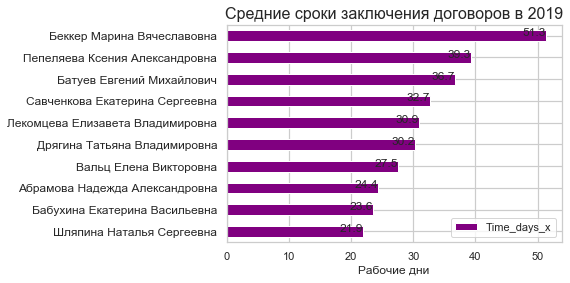

<Figure size 1120x1120 with 0 Axes>

In [111]:
df_agg_author = df_agg_c[df_agg_c['Department'] == 'Отдел по закупке общезаводского и электрооборудования'].groupby(['Author']).mean()['Time_days_x'].reset_index()
df_agg_author.sort_values('Time_days_x', inplace = True)
df_agg_author.reset_index(inplace = True)
df_agg_author.plot('Author', 'Time_days_x', kind = 'barh', color = 'purple')
for x, y, tex in zip(df_agg_author['Time_days_x'], 
                     df_agg_author.index, 
                     df_agg_author['Time_days_x']):
    t = plt.text(x, y, round(tex, 1), horizontalalignment='right', 
                 verticalalignment='baseline')
plt.yticks(df_agg_author.index, df_agg_author.Author, fontsize=12)
plt.grid(which='major', linewidth=1.2) 
plt.xlabel('Рабочие дни')
plt.ylabel('')
plt.title('Средние сроки заключения договоров в 2019', fontsize=16)
plt.figure(figsize=(14,14), dpi= 80)

In [112]:
df_agg_author=df_agg_c[df_agg_c['Author'] == 'Вальц Елена Викторовна'].groupby(['Month_number', 'Month_new']).mean()['Time_days_x'].reset_index()

In [113]:
df_agg_author

,Month_number,Month_new,Time_days_x
0,1,January,30.846154
1,2,February,31.230769
2,3,March,22.285714
3,4,April,26.176471
4,5,May,37.545455
5,6,June,31.692308
6,7,July,27.636364
7,8,August,24.083333
8,9,September,27.545455
9,10,October,24.444444


In [114]:
df_agg_dz=df_agg_c[df_agg_c['Direction'] == 'Дирекция по закупкам'].groupby(['Month_number', 'Month_new']).mean()['Time_days_x'].reset_index()

In [115]:
df_agg_otdel=df_agg_c[df_agg_c['Department'] == 'Отдел по закупке общезаводского и электрооборудования'].groupby(['Month_number', 'Month_new']).mean()['Time_days_x'].reset_index()

In [116]:
columns_2 = [ 'Дирекция по закупкам', 'Отдел по закупке общезаводского и электрооборудования', 'Вальц Елена Викторовна']

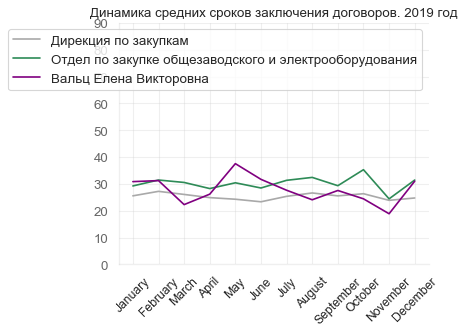

In [117]:
plt.figure(figsize=(5,4), dpi= 80)
plt.plot('Month_new', 'Time_days_x', data=df_agg_dz, color='darkgrey')
plt.plot('Month_new', 'Time_days_x', data=df_agg_otdel, color='seagreen')
plt.plot('Month_new', 'Time_days_x', data=df_agg_author, color='purple')
plt.ylim(0, 90)
plt.legend(columns_2, loc='best', fontsize=12)

plt.yticks(fontsize=12, alpha=.7)
plt.xticks(rotation=45)
plt.title("Динамика средних сроков заключения договоров. 2019 год", fontsize=12)
plt.grid(axis='both', alpha=.3)

# Remove borders
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)   
plt.show()

3. Признаки Дирекция

In [118]:
df_agg_c.groupby(['Direction']).agg(['count', 'mean', 'median', 'min', 'max', 'std'])['Time_days_x'].sort_values('count', ascending = False)

,count,mean,median,min,max,std
Direction,,,,,,
Дирекция по закупкам,2742,25.326039,21.0,0,303,19.922364
Техническая дирекция,1401,29.602427,24.0,1,554,25.628410
Дирекция по персоналу,896,23.359375,19.0,0,286,23.179028
Дирекция по капитальному строительству,624,24.105769,21.0,0,121,14.173372
Дирекция по правовым и корпоративным вопросам,595,20.684034,16.0,0,271,20.728752
Дирекция по недропользованию,249,23.931727,20.0,0,81,13.689801
Дирекция по информационным технологиям,229,38.567686,31.0,5,211,26.075817
Дирекция по безопасности,116,10.586207,8.0,0,56,9.794470
"Дирекция по охране труда, промышленной безопасности и охране окружающей среды",101,26.257426,25.0,2,114,16.170129


In [119]:
direction_std = df_agg_c.groupby(['Direction']).agg(['count', 'mean', 'median', 'min', 'max', 'std'])['Time_days_x'].reset_index()

In [120]:
direction_std['std'].mean()

20.17531839933565

In [322]:
direction_std['mean'].max()-direction_std['mean'].min()

27.981478692967926

In [323]:
direction_std['max'].max()-direction_std['min'].min()

554

<Figure size 1120x1120 with 0 Axes>

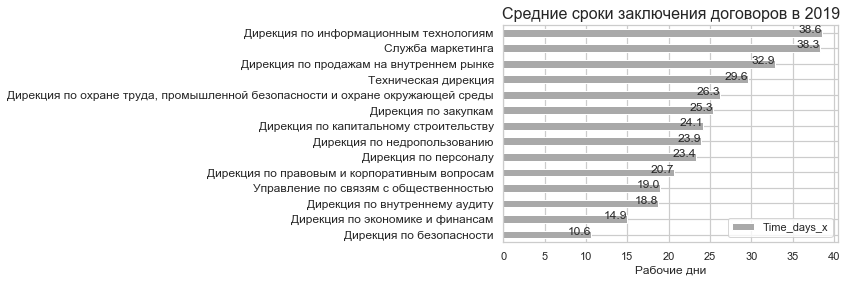

<Figure size 1120x1120 with 0 Axes>

In [121]:
df_agg_direction = df_agg_c[df_agg_c['Direction'] != 'error direction'].groupby(['Direction']).mean()['Time_days_x'].reset_index()
df_agg_direction.sort_values('Time_days_x', inplace = True)
df_agg_direction.reset_index(inplace = True)
df_agg_direction.plot('Direction', 'Time_days_x', kind = 'barh', color = 'darkgrey')
for x, y, tex in zip(df_agg_direction['Time_days_x'], 
                     df_agg_direction.index, 
                     df_agg_direction['Time_days_x']):
    t = plt.text(x, y, round(tex, 1), horizontalalignment='right', 
                 verticalalignment='baseline')
plt.yticks(df_agg_direction.index, df_agg_direction.Direction, fontsize=12)
plt.grid(which='major', linewidth=1.2) 
plt.xlabel('Рабочие дни')
plt.ylabel('')
plt.title('Средние сроки заключения договоров в 2019', fontsize=16)
plt.figure(figsize=(14,14), dpi= 80)


In [122]:

df_agg_dit=df_agg_c[df_agg_c['Direction'] == 'Дирекция по информационным технологиям'].groupby(['Month_number', 'Month_new']).mean()['Time_days_x'].reset_index()
df_agg_td=df_agg_c[df_agg_c['Direction'] == 'Техническая дирекция'].groupby(['Month_number', 'Month_new']).mean()['Time_days_x'].reset_index()
df_agg_dks=df_agg_c[df_agg_c['Direction'] == 'Дирекция по капитальному строительству'].groupby(['Month_number', 'Month_new']).mean()['Time_days_x'].reset_index()

In [123]:
df_agg_all=df_agg_c.groupby(['Month_number', 'Month_new']).mean()['Time_days_x'].reset_index()

In [124]:
columns_1 = ['Дирекция по информационным технологиям', 'Техническая дирекция', 
           'Дирекция по капитальному строительству','Средний уровень по УК']

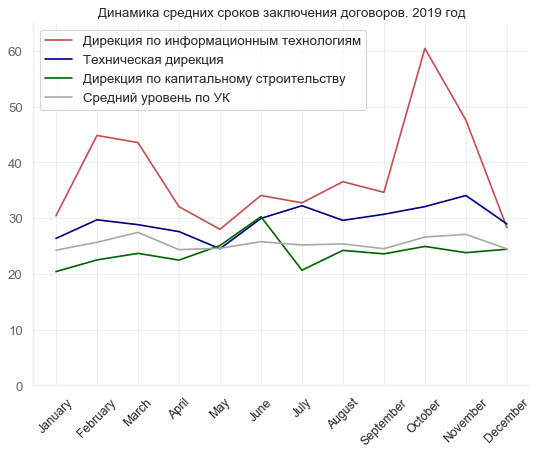

In [125]:
plt.figure(figsize=(8,6), dpi= 80)
plt.plot('Month_new', 'Time_days_x', data=df_agg_dit, color='r')
plt.plot('Month_new', 'Time_days_x', data=df_agg_td, color='navy')
plt.plot('Month_new', 'Time_days_x', data=df_agg_dks, color='darkgreen')
plt.plot('Month_new', 'Time_days_x', data=df_agg_all, color='darkgrey')
plt.ylim(0, 65)
plt.legend(columns_1, loc='best', fontsize=12)

plt.yticks(fontsize=12, alpha=.7)
plt.xticks(rotation=45)
plt.title("Динамика средних сроков заключения договоров. 2019 год", fontsize=12)
plt.grid(axis='both', alpha=.3)

# Remove borders
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)   
plt.show()

In [126]:
columns = ['Дирекция по закупкам','Средний уровень по УК']
df_agg_dz=df_agg_c[df_agg_c['Direction'] == 'Дирекция по закупкам'].groupby(['Month_number', 'Month_new']).mean()['Time_days_x'].reset_index()

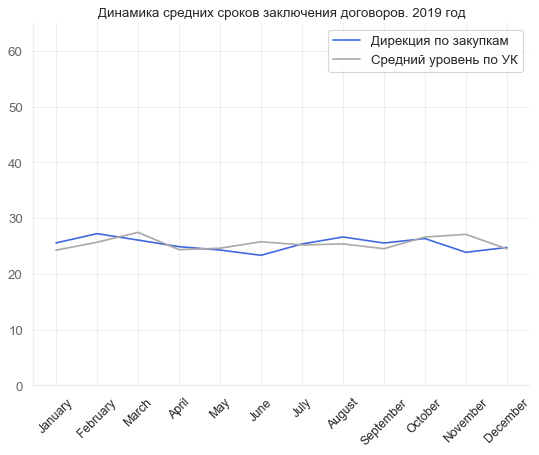

In [127]:
plt.figure(figsize=(8,6), dpi= 80)
plt.plot('Month_new', 'Time_days_x', data=df_agg_dz, color='royalblue')
plt.plot('Month_new', 'Time_days_x', data=df_agg_all, color='darkgrey')
plt.ylim(0, 65)
plt.legend(columns, loc='best', fontsize=12)

plt.yticks(fontsize=12, alpha=.7)
plt.xticks(rotation=45)
plt.title("Динамика средних сроков заключения договоров. 2019 год", fontsize=12)
plt.grid(axis='both', alpha=.3)

# Remove borders
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)   
plt.show()


Добавить данное представление описательной статистики к уже собираемой аналитиком по среднем срокам.
Также как с контрагентом можно добавить графики изменения длительности договора во времени.
Так как у нас есть проблемы с соотвествием двух справочников ШР, то по управлениям получать такие статистики не целеесообразно.

4. Отдел

In [128]:
df_agg_c.groupby(['Department']).agg(['count', 'mean', 'median', 'min', 'max', 'std'])['Time_days_x'].sort_values('count', ascending = False)

,count,mean,median,min,max,std
Department,,,,,,
0,1709,27.944412,23.0,0,286,21.100625
Отдел по закупке общезаводского и электрооборудования,852,30.278169,26.0,1,176,20.887114
"Отдел по закупке горно-шахтного, конвейерного и вспомогательного оборудования",610,29.714754,24.0,1,303,23.553815
Отдел сопровождения земельных и имущественных отношений,478,20.307531,16.0,0,185,15.552696
Отдел по закупке металлопродукции и резинотехнических изделий,425,15.529412,13.0,4,66,9.424712
Отдел по закупке производственных и вспомогательных материалов,396,20.623737,18.0,1,101,14.217562
Отдел проектно-изыскательских работ и сопровождения экспертиз,329,21.577508,20.0,0,79,10.198379
Планово-договорной отдел,295,26.925424,23.0,0,121,17.161533
Отдел по ремонту и эксплуатации зданий и сооружений,271,25.184502,21.0,6,161,18.322499


In [129]:
df_agg_c.groupby(['Department']).agg(['count', 'mean', 'median', 'min', 'max', 'std'])['Time_days_x'].sort_values('mean', ascending = False)

,count,mean,median,min,max,std
Department,,,,,,
Отдел технического развития,1,83.000000,83.0,83,83,NaN
Отдел управления качеством,1,45.000000,45.0,45,45,NaN
Административно-хозяйственный отдел,18,43.055556,36.0,9,97,24.877280
Отдел вагонного хозяйства,46,42.826087,29.0,12,554,78.594686
"Отдел планирования, нормирования и распределения ТЭР",86,42.151163,31.0,6,248,40.721585
Отдел по расчету и учету заработной платы,3,39.333333,26.0,18,74,30.287511
Отдел мониторинга и оценки качества работ,6,39.000000,40.0,17,54,14.071247
Отдел по оформлению и продажам на внутреннем рынке,248,38.975806,33.5,5,246,29.335961
Отдел продвижения продукции,11,37.727273,35.0,15,105,25.581599


In [130]:
department_std=df_agg_c.groupby(['Department']).agg(['count', 'mean', 'median', 'min', 'max', 'std'])['Time_days_x'].reset_index()

In [131]:
department_std['std'].mean()

19.43404700445315

In [324]:
department_std['mean'].max()-department_std['mean'].min()

82.5

<Figure size 1120x1120 with 0 Axes>

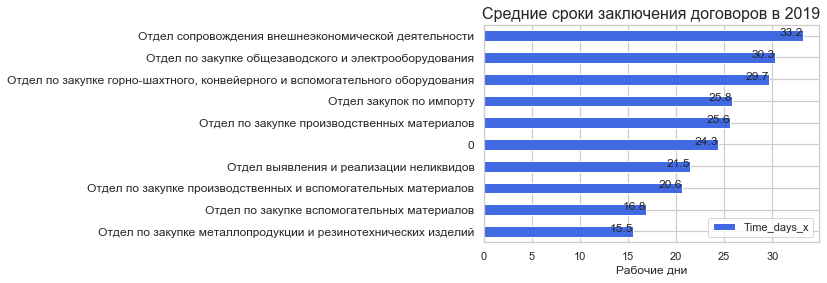

<Figure size 1120x1120 with 0 Axes>

In [132]:
df_agg_department = df_agg_c[df_agg_c['Direction'] == 'Дирекция по закупкам'].groupby(['Department']).mean()['Time_days_x'].reset_index()
df_agg_department.sort_values('Time_days_x', inplace = True)
df_agg_department.reset_index(inplace = True)
df_agg_department.plot('Department', 'Time_days_x', kind = 'barh', color = 'royalblue')
for x, y, tex in zip(df_agg_department['Time_days_x'], 
                     df_agg_department.index, 
                     df_agg_department['Time_days_x']):
    t = plt.text(x, y, round(tex, 1), horizontalalignment='right', 
                 verticalalignment='baseline')
plt.yticks(df_agg_department.index, df_agg_department.Department, fontsize=12)
plt.grid(which='major', linewidth=1.2) 
plt.xlabel('Рабочие дни')
plt.ylabel('')
plt.title('Средние сроки заключения договоров в 2019', fontsize=16)
plt.figure(figsize=(14,14), dpi= 80)

5. Профиль

In [133]:
df_agg_c.groupby(['Profile']).agg(['count', 'mean', 'median', 'min', 'max', 'std'])['Time_days_x'].sort_values('mean', ascending = False)

,count,mean,median,min,max,std
Profile,,,,,,
Предоставление гостиничных услуг,2,96.000000,96.0,17,175,111.722871
Оказание услуг связи,10,55.100000,38.0,29,126,32.576235
"Договоры комиссии,поручения,агентские",2,47.500000,47.5,6,89,58.689863
"Ремонт транспортных средств (автотранспорта,ж/д подвижного состава,катеров,судов воздушного и водного транспорта)",49,41.897959,27.0,12,554,76.183781
"Обеспечение э/энергией,паром,водой,прием сточных вод и т.п.",65,37.415385,25.0,6,248,43.785304
Сбыт продукции на внешний рынок и страны СНГ,19,35.947368,37.0,0,141,34.406837
Сбыт продукции на внутренний рынок,336,33.407738,25.5,0,246,27.940830
"Консультационные услуги (в т.ч. проведение конференций, семинаров)",12,32.833333,13.5,1,197,55.119430
Прочие договоры купли-продажи,22,31.318182,29.5,11,70,13.105384


In [134]:
profile_std = df_agg_c.groupby(['Profile']).agg(['count', 'mean', 'median', 'min', 'max', 'std'])['Time_days_x'].reset_index()

In [135]:
profile_std['std'].mean()

21.158779935578814

In [325]:
profile_std['mean'].max()-profile_std['mean'].min()

95.0

In [136]:
df_agg_c.groupby(['Profile']).agg(['count', 'mean', 'median', 'min', 'max', 'std'])['Time_days_x'].sort_values('mean', ascending = False)

,count,mean,median,min,max,std
Profile,,,,,,
Предоставление гостиничных услуг,2,96.000000,96.0,17,175,111.722871
Оказание услуг связи,10,55.100000,38.0,29,126,32.576235
"Договоры комиссии,поручения,агентские",2,47.500000,47.5,6,89,58.689863
"Ремонт транспортных средств (автотранспорта,ж/д подвижного состава,катеров,судов воздушного и водного транспорта)",49,41.897959,27.0,12,554,76.183781
"Обеспечение э/энергией,паром,водой,прием сточных вод и т.п.",65,37.415385,25.0,6,248,43.785304
Сбыт продукции на внешний рынок и страны СНГ,19,35.947368,37.0,0,141,34.406837
Сбыт продукции на внутренний рынок,336,33.407738,25.5,0,246,27.940830
"Консультационные услуги (в т.ч. проведение конференций, семинаров)",12,32.833333,13.5,1,197,55.119430
Прочие договоры купли-продажи,22,31.318182,29.5,11,70,13.105384


6. Признак Количество этапов в при визировании договора

In [137]:
df_agg_c.groupby(['Step']).agg(['count', 'mean', 'median', 'min', 'max', 'std'])['Time_days_x'].sort_values('Step', ascending = True)

,count,mean,median,min,max,std
Step,,,,,,
2,4,0.250000,0.0,0,1,0.500000
3,196,2.734694,1.0,0,43,5.507200
4,73,3.342466,1.0,0,72,8.626862
5,28,2.035714,1.0,0,8,2.202392
6,55,6.036364,4.0,0,49,7.803047
7,332,18.280120,14.0,1,175,18.193235
8,610,20.131148,16.0,2,124,14.499165
9,610,23.957377,18.0,1,248,22.268141
10,891,23.493827,19.0,1,178,17.820034


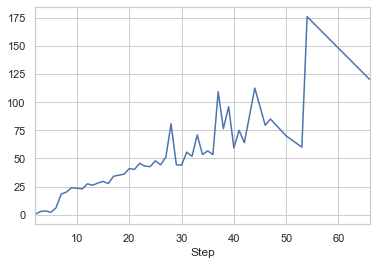

In [138]:
df_agg_c.groupby(['Step']).mean()['Time_days_x'].plot()

In [139]:
df_agg_c.corr()['Step']

ID contract       -0.277486
Time_days_x        0.388071
ZNP_bin            0.291812
Department_bin    -0.116630
Description_bin    0.063147
Time_days_y        0.169338
Step               1.000000
Month_number      -0.138515
Name: Step, dtype: float64

In [140]:
df_agg_c['Step'].describe()

count    7250.000000
mean       11.953103
std         4.784760
min         2.000000
25%         9.000000
50%        11.000000
75%        13.000000
max        66.000000
Name: Step, dtype: float64

Корреляция между количеством этапов при заключении договора и временем заключения договора есть, ожидаемо она положительная, но ее расчетное значение умеренное (0,39) из-за выбросов. Хотя на графике можно увидеть тренд прямой зависимости.
Step является не однозначным критерием для будущей модели, так как по сути это утечка данных (когда договор приходит в СЭД нам не известно кол-во этапов его будущего визирования)

7. Признак: срок выполнения этапа работа с заказом на приобритение

In [141]:
df_agg_c[df_agg_c['Time_days_y'] > -1].groupby(['Time_days_y']).agg(['count', 'mean', 'median', 'min', 'max', 'std'])['Time_days_x']

,count,mean,median,min,max,std
Time_days_y,,,,,,
0.0,1370,27.291971,23,0,271,18.659793
1.0,61,38.967213,24,2,554,70.335379
2.0,25,33.720000,25,11,143,28.442222
3.0,4,26.750000,22,9,54,19.241881
4.0,9,25.222222,20,11,44,13.525696
5.0,4,28.750000,24,12,55,18.409689
6.0,1,21.000000,21,21,21,NaN
7.0,7,26.714286,29,17,35,7.227593
8.0,7,22.428571,20,15,37,8.283661


In [142]:
df_agg_c[df_agg_c['Time_days_y'] > -1].corr()['Time_days_y']

ID contract       -0.024217
Time_days_x        0.029150
ZNP_bin                 NaN
Department_bin     0.144831
Description_bin    0.034101
Time_days_y        1.000000
Step              -0.028952
Month_number      -0.028426
Name: Time_days_y, dtype: float64

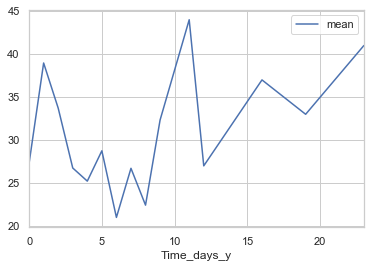

In [143]:
df_agg_c[df_agg_c['Time_days_y'] > -1].groupby(['Time_days_y']).agg(['mean'])['Time_days_x'].plot()

Несбалансированность классов: 0 рд имеет 93% всех договоров с ЗнП. Самые многочисленные классы (0 рд, 1 рд и 2 рд) демонстрируют большой разброс значений сроков заключения договора (стандартные ошибки: 19,6 рд, 100,6 рд и 13.3 рд соответственно). Поэтому есть сомнения полезности данного признака. Признак удаляем

#### Критерий Стьюдента

In [144]:
from scipy import stats

8. Признак наличие ЗНП

Гипотеза: средний срок заключения договора если есть ЗНП, не отличается от среднего срока генеральной совокупности

In [145]:
ZNP_1 = df_agg_c[df_agg_c['ZNP_bin'] == 1]
ZNP_0 = df_agg_c[df_agg_c['ZNP_bin'] == 0]

In [146]:
stats.ttest_ind(ZNP_1['Time_days_x'], ZNP_0['Time_days_x'])

Ttest_indResult(statistic=4.9626968385272585, pvalue=7.110616213300187e-07)

гипотеза не верна, две выборки отличаются друг от друга (но больше регламента = 22 рд). Но сам критегий не однозначный (не совпадает кол-во ЗнП в двух однородных отчетах)

In [147]:
ZNP_1['Time_days_x'].mean()

27.93124165554072

In [148]:
ZNP_0['Time_days_x'].mean()

24.81884561891516

9. Признак наличие Описания договора

Гипотеза: средний срок заключения договора, если есть Описание, не отличается от среднего, где нет Описания 

In [149]:
Description_1 = df_agg_c[df_agg_c['Description_bin'] == 1]
Description_0 = df_agg_c[df_agg_c['Description_bin'] == 0]

In [150]:
stats.ttest_ind(Description_1['Time_days_x'], Description_0['Time_days_x'])

Ttest_indResult(statistic=-0.24907444855101038, pvalue=0.8033102513358947)

In [151]:
Description_1.describe()['Time_days_x']

count    6473.000000
mean       25.439981
std        21.274302
min         0.000000
25%        13.000000
50%        21.000000
75%        31.000000
max       554.000000
Name: Time_days_x, dtype: float64

In [152]:
Description_0.describe()['Time_days_x']

count    777.000000
mean      25.644788
std       24.622196
min        0.000000
25%       13.000000
50%       21.000000
75%       30.000000
max      271.000000
Name: Time_days_x, dtype: float64

гипотеза верна, две выборки статистичиски не отличаются друг от друга по среднему срока заключения договора.
Распределения по сроку заключения договора также практически идентичны.
Посмотрим есть ли стат. зависимость между долей договоров без описания у авторов и среднем сроком заключения договоров

In [153]:
author_0=df_agg_c[df_agg_c['Description_bin']==0].groupby(['Author']).agg(['count', 'mean', 'median'])['Time_days_x'].reset_index()

In [154]:
author_all = df_agg_c.groupby(['Author']).count()['ID contract'].reset_index()

In [155]:
author_0 = author_0.merge(author_all, on = 'Author', how = 'left')

In [156]:
author_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 0 to 71
Data columns (total 5 columns):
Author         72 non-null object
count          72 non-null int64
mean           72 non-null float64
median         72 non-null float64
ID contract    72 non-null int64
dtypes: float64(2), int64(2), object(1)
memory usage: 3.4+ KB


In [157]:
author_0['dolya'] = author_0['count']/author_0['ID contract']

In [158]:
author_0.sort_values('dolya', ascending = False)

,Author,count,mean,median,ID contract,dolya
71,Шупеник Алена Викторовна,16,7.687500,1.0,16,1.000000
46,Ро Наталия Валерьевна,1,2.000000,2.0,1,1.000000
17,Заманова Анна Сергеевна,3,36.666667,22.0,3,1.000000
26,Корсунцева Светлана Владимировна,2,14.500000,14.5,2,1.000000
31,Литвинова Яна Васильевна,2,0.500000,0.5,2,1.000000
...,...,...,...,...,...,...
68,Широков Сергей Владимирович,1,28.000000,28.0,59,0.016949
32,Лихарева Ксения Игоревна,1,22.000000,22.0,71,0.014085
52,Сиринова Марина Владимировна,1,14.000000,14.0,106,0.009434
7,Бубнова Светлана Михайловна,1,40.000000,40.0,122,0.008197


In [159]:
author_0.corr()['mean']

count          0.047339
mean           1.000000
median         0.955314
ID contract    0.057758
dolya          0.126612
Name: mean, dtype: float64

Корреляции между средним сроком заключения договора и долей таких договоров у автора слабая 0.13.
Признак Наличие описания удалить из модели

10. Признак Работник отдела

In [160]:
Department_1 = df_agg_c[df_agg_c['Department_bin'] == 1]
Department_0 = df_agg_c[df_agg_c['Department_bin'] == 0]

гипотеза: средний срок заключения договора, если сотрудник работает в отделе, не отличается от среднего, где не работник отдела

In [161]:
stats.ttest_ind(Department_1['Time_days_x'], Department_0['Time_days_x'])

Ttest_indResult(statistic=-5.43130017807342, pvalue=5.7760516241186055e-08)

гипотеза не верна, средние сроки этих совокупностей отличаются (но больше регламента = 22 рд)

In [162]:
Department_1.mean()['Time_days_x']

24.69626421223606

In [163]:
Department_0.mean()['Time_days_x']

27.94441193680515

Как уже писала признак Step (кол-во этапов для каждого договора) Time_days_x (срок заключения каждого договора) являются утечкой данных. Так как мы не знаем ни кол-во этапов визирования договора ни срок заключения договора, пришедшего в СЭД. С этими признаками мы можем работать опосредованно через их средние / медианные значения для контрагентов, авторов, подразделений, профилей и т.д. Также можно делать группы (категории) по средним / медианным значениям. 
По сути мы используем накопленную статистику в разрезе признака. Проблема - со временем статистика устаривает и модель надо обновлять фактическими данными.

In [164]:
concated.groupby(['Step']).count()['ID contract']

Step
Веерное согласование                                                                12707
Гос. регистрация договора                                                              30
Направить в совет директоров                                                         1105
Определение рисков Службой Безопасности                                              1516
Определение целесообразности Исполнительным Директором                               5586
Подписание Договора                                                                  7098
Подтверждение заключенности договора регистратором                                   7334
Принятие решения о согласовании тем, кто определял целесообразность                     6
Проверка карточки регистратором                                                       366
Проверка регистратора. Определение Исполнителя и состава Согласующих                 9028
Проверка регистратором после устранения замечаний                                    5877
Работ

11. Введем группировку для к/а по среднему сроку выполнения этапа Работа с к/а

In [165]:
rabota_k=concated[concated['Step'] == 'Работа с контрагентом'].groupby(['ID contract']).sum()['Time_days'].reset_index()

In [166]:
rabota_p = df_agg_c[['ID contract',  'Partner']].reset_index()

In [167]:
rabota_k = rabota_k.merge(rabota_p, on = 'ID contract', how ='left')

In [168]:
rabota_k = rabota_k.groupby(['Partner']).mean()['Time_days'].reset_index()

In [169]:
rabota_k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1980 entries, 0 to 1979
Data columns (total 2 columns):
Partner      1980 non-null object
Time_days    1980 non-null float64
dtypes: float64(1), object(1)
memory usage: 31.1+ KB


In [170]:
rabota_k.describe()

,Time_days
count,1980.000000
mean,14.193965
std,16.007975
min,0.000000
25%,4.474359
50%,10.366667
75%,18.500000
max,252.000000


In [171]:
rabota_k[rabota_k['Time_days'] > 19].count()['Partner']

463

In [172]:
def group_partner_rabota(dt):
    if dt <= 4.5:
        return '0-4 rd'
    elif dt > 4.5 and dt <= 10:
        return '5-10 rd'
    elif dt > 10 and dt <19:
        return '11-18 rd'
    else:
        return '> 18 rd'

In [173]:
rabota_k['Group_partner_rabota'] = rabota_k['Time_days'].apply(group_partner_rabota)

In [174]:
df_agg_c = df_agg_c.merge(rabota_k, on = 'Partner', how = 'left')

In [175]:
df_agg_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7250 entries, 0 to 7249
Data columns (total 18 columns):
ID contract             7250 non-null int64
Time_days_x             7250 non-null int64
Partner                 7250 non-null object
Profile                 7250 non-null object
Author                  7250 non-null object
Department              7250 non-null object
Direction               7250 non-null object
Month                   7250 non-null object
ZNP_bin                 7250 non-null int64
Department_bin          7250 non-null int64
Description_bin         7250 non-null int64
Time_days_y             7250 non-null float64
Step                    7250 non-null int64
Date                    7250 non-null datetime64[ns]
Month_new               7250 non-null object
Month_number            7250 non-null int64
Time_days               6923 non-null float64
Group_partner_rabota    6923 non-null object
dtypes: datetime64[ns](1), float64(2), int64(7), object(8)
memory usage: 1.1+ MB

In [176]:
df_agg_c.drop('Time_days', axis=1, inplace = True)

In [177]:
df_agg_c.groupby(['Group_partner_rabota']).count()['ID contract']

Group_partner_rabota
0-4 rd      1128
11-18 rd    2294
5-10 rd     2187
> 18 rd     1314
Name: ID contract, dtype: int64

12. Проанализируем работу автора на этапах "2-х версий"

In [178]:
author_rabota = concated[(concated['Step'] == 'Устранение замечаний') | 
                         (concated['Step'] == 'Работа исполнителя с Договором') |
                         (concated['Step'] == 'Согласование Директором по правовым и корпоративным вопросам') |
                         (concated['Step'] == 'Согласование директором исполнителя') |
                         (concated['Step'] == 'Согласование с Директорами ранее не согласовавших') |
                         (concated['Step'] == 'Устранение Исполнителем замечаний') |
                         (concated['Step'] == 'Устранение Исполнителем замечаний Директора по правовым и корпоративным вопросам') |
                         (concated['Step'] == 'Утверждение условий договора руководителем') |
                         (concated['Step'] == 'Проверка регистратором после устранения замечаний')].groupby(['ID contract']).sum()['Time_days'].reset_index()

In [179]:
author_rabota_1 = df_agg_c[['ID contract', 'Author']].reset_index()

In [180]:
author_rabota = author_rabota.merge(author_rabota_1, on = 'ID contract', how = 'left')

In [181]:
author_rabota = author_rabota.groupby(['Author']).mean()['Time_days'].reset_index()

In [182]:
author_rabota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 2 columns):
Author       224 non-null object
Time_days    224 non-null float64
dtypes: float64(1), object(1)
memory usage: 3.6+ KB


In [183]:
author_rabota.describe()['Time_days']

count    224.000000
mean       5.718075
std       10.078196
min        0.000000
25%        1.666667
50%        3.198718
75%        5.685000
max      121.000000
Name: Time_days, dtype: float64

Большинство наблюдений находится в отрезке 0-5,6 рд времени работы на данных этапах (1, 2 и 3 квантили). Есть выбросы, направленые к max/ В большинстве данные этапы дают увеличение срока заключения около 3 рд к остальным этапам

In [184]:
df_agg_c = df_agg_c.merge(author_rabota, on = 'Author', how = 'left')

In [185]:
df_agg_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7250 entries, 0 to 7249
Data columns (total 18 columns):
ID contract             7250 non-null int64
Time_days_x             7250 non-null int64
Partner                 7250 non-null object
Profile                 7250 non-null object
Author                  7250 non-null object
Department              7250 non-null object
Direction               7250 non-null object
Month                   7250 non-null object
ZNP_bin                 7250 non-null int64
Department_bin          7250 non-null int64
Description_bin         7250 non-null int64
Time_days_y             7250 non-null float64
Step                    7250 non-null int64
Date                    7250 non-null datetime64[ns]
Month_new               7250 non-null object
Month_number            7250 non-null int64
Group_partner_rabota    6923 non-null object
Time_days               7241 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(7), object(8)
memory usage: 1.1+ MB

Практически все договоры имеют один или несколько данных этапов при визировании договора: 7241/7250 = 0,99

In [186]:
df_agg_c['Time_days'].fillna(999, inplace = True)

In [187]:
def author_bin(d4):
    if d4 == 999:
        return 0
    else:
        return 1

In [188]:
df_agg_c['Author_2_bin'] = df_agg_c['Time_days'].apply(author_bin)

In [189]:
df_agg_c.groupby(['Author_2_bin']).count()['ID contract']

Author_2_bin
0       9
1    7241
Name: ID contract, dtype: int64

In [190]:
Author_1 = df_agg_c[df_agg_c['Author_2_bin'] == 1]
Author_0 = df_agg_c[df_agg_c['Author_2_bin'] == 0]

In [191]:
stats.ttest_ind(Author_1['Time_days_x'], Author_0['Time_days_x'])

Ttest_indResult(statistic=2.3750440549591025, pvalue=0.017572724276915575)

In [192]:
Author_1['Time_days_x'].mean()

25.48322054964784

In [193]:
Author_0['Time_days_x'].mean()

8.333333333333334

У маленькой группы договоров, у которых нет данных этапов средние сроки сильно отличаются от группы, где данные этапы есть. Оставим данный признак

In [194]:
df_agg_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7250 entries, 0 to 7249
Data columns (total 19 columns):
ID contract             7250 non-null int64
Time_days_x             7250 non-null int64
Partner                 7250 non-null object
Profile                 7250 non-null object
Author                  7250 non-null object
Department              7250 non-null object
Direction               7250 non-null object
Month                   7250 non-null object
ZNP_bin                 7250 non-null int64
Department_bin          7250 non-null int64
Description_bin         7250 non-null int64
Time_days_y             7250 non-null float64
Step                    7250 non-null int64
Date                    7250 non-null datetime64[ns]
Month_new               7250 non-null object
Month_number            7250 non-null int64
Group_partner_rabota    6923 non-null object
Time_days               7250 non-null float64
Author_2_bin            7250 non-null int64
dtypes: datetime64[ns](1), float64(2

In [195]:
df_agg_c.drop('Time_days', axis=1, inplace = True)

Посмотрим на кол-во авторов со средними сроками на этапах "2-х версий" больше 3 квантиля

In [196]:
author_rabota[author_rabota['Time_days'] > 5.7].count()['Author']

56

Выделим таких авторов в отдельную группу

In [197]:
def author_long(d5):
    if d5 <= 5.7:
        return '0 gr'
    else:
        return '1 gr'

In [198]:
author_rabota['Author_long'] = author_rabota['Time_days'].apply(author_long)

In [199]:
author_rabota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 3 columns):
Author         224 non-null object
Time_days      224 non-null float64
Author_long    224 non-null object
dtypes: float64(1), object(2)
memory usage: 5.4+ KB


In [200]:
df_agg_c = df_agg_c.merge(author_rabota, on = 'Author', how = 'left')

In [201]:
df_agg_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7250 entries, 0 to 7249
Data columns (total 20 columns):
ID contract             7250 non-null int64
Time_days_x             7250 non-null int64
Partner                 7250 non-null object
Profile                 7250 non-null object
Author                  7250 non-null object
Department              7250 non-null object
Direction               7250 non-null object
Month                   7250 non-null object
ZNP_bin                 7250 non-null int64
Department_bin          7250 non-null int64
Description_bin         7250 non-null int64
Time_days_y             7250 non-null float64
Step                    7250 non-null int64
Date                    7250 non-null datetime64[ns]
Month_new               7250 non-null object
Month_number            7250 non-null int64
Group_partner_rabota    6923 non-null object
Author_2_bin            7250 non-null int64
Time_days               7241 non-null float64
Author_long             7241 non-nul

In [202]:
df_agg_c.drop('Time_days', axis=1, inplace = True)

In [203]:
df_agg_c.groupby(['Author_long']).count()['ID contract']

Author_long
0 gr    5962
1 gr    1279
Name: ID contract, dtype: int64

13. Введем группировку по среднему сроку по каждому к/а на этапах, аналогичным 12 (показывает сложность условий договора с к/а)

In [204]:
partner_iteration = concated[(concated['Step'] == 'Проверка регистратором после устранения замечаний') | 
                             (concated['Step'] == 'Работа исполнителя с Договором') |
                             (concated['Step'] == 'Согласование Директором по правовым и корпоративным вопросам') |
                             (concated['Step'] == 'Согласование директором исполнителя') |
                             (concated['Step'] == 'Согласование с Директорами ранее не согласовавших') |
                             (concated['Step'] == 'Устранение Исполнителем замечаний') |
                             (concated['Step'] == 'Устранение Исполнителем замечаний Директора по правовым и корпоративным вопросам') |
                             (concated['Step'] == 'Утверждение условий договора руководителем') |
                             (concated['Step'] == 'Устранение замечаний')].groupby(['ID contract']).sum()['Time_days'].reset_index()

In [205]:
partner_iteration = partner_iteration.merge(rabota_p, on = 'ID contract', how = 'left')

In [206]:
partner_iteration = partner_iteration.groupby(['Partner']).mean()['Time_days'].reset_index()

In [207]:
partner_iteration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1799 entries, 0 to 1798
Data columns (total 2 columns):
Partner      1799 non-null object
Time_days    1799 non-null float64
dtypes: float64(1), object(1)
memory usage: 28.2+ KB


In [208]:
partner_iteration['Time_days'].describe()

count    1799.000000
mean        4.947687
std        13.454537
min         0.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       438.000000
Name: Time_days, dtype: float64

In [209]:
def partner_quant(d6):
    if d6 <= 1:
        return '0-1 rd'
    elif d6 > 1 and d6 <=2:
        return '2 rd'
    elif d6 > 2 and d6 <=5:
        return '3-5 rd'
    else:
        return '>5 rd'

In [210]:
partner_iteration['Partner_2step_quant'] = partner_iteration['Time_days'].apply(partner_quant)

In [211]:
df_agg_c = df_agg_c.merge(partner_iteration, on = 'Partner', how = 'left')

In [212]:
df_agg_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7250 entries, 0 to 7249
Data columns (total 21 columns):
ID contract             7250 non-null int64
Time_days_x             7250 non-null int64
Partner                 7250 non-null object
Profile                 7250 non-null object
Author                  7250 non-null object
Department              7250 non-null object
Direction               7250 non-null object
Month                   7250 non-null object
ZNP_bin                 7250 non-null int64
Department_bin          7250 non-null int64
Description_bin         7250 non-null int64
Time_days_y             7250 non-null float64
Step                    7250 non-null int64
Date                    7250 non-null datetime64[ns]
Month_new               7250 non-null object
Month_number            7250 non-null int64
Group_partner_rabota    6923 non-null object
Author_2_bin            7250 non-null int64
Author_long             7241 non-null object
Time_days               6717 non-null

In [213]:
df_agg_c.drop('Time_days', axis = 1, inplace=True)

14. Введем группировку по среднему сроку выполнения этапа Работа с к/а для каждого Автора (косвенно показывает качество работы автора с к/а)

In [214]:
rabota_k_a=concated[concated['Step'] == 'Работа с контрагентом'].groupby(['ID contract']).sum()['Time_days'].reset_index()

In [215]:
rabota_k_a = rabota_k_a.merge(author_rabota_1, on = 'ID contract', how ='left')

In [216]:
rabota_k_a = rabota_k_a.groupby(['Author']).mean()['Time_days'].reset_index()

In [217]:
rabota_k_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 2 columns):
Author       222 non-null object
Time_days    222 non-null float64
dtypes: float64(1), object(1)
memory usage: 3.6+ KB


In [218]:
rabota_k_a['Time_days'].describe()

count    222.000000
mean      12.184156
std        9.700238
min        0.000000
25%        6.306738
50%       10.007937
75%       15.699597
max       89.500000
Name: Time_days, dtype: float64

In [219]:
def author_quant(d7):
    if d7 <= 6.3:
        return '0-6 rd'
    elif d7 > 6.3 and d7 <=10:
        return '7-10 rd'
    elif d7 > 10 and d7 <=15.7:
        return '11-16 rd'
    else:
        return '>16 rd'

In [220]:
rabota_k_a['Author_rabota_quant'] = rabota_k_a['Time_days'].apply(author_quant)

In [221]:
df_agg_c = df_agg_c.merge(rabota_k_a, on = 'Author', how = 'left')

In [222]:
df_agg_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7250 entries, 0 to 7249
Data columns (total 22 columns):
ID contract             7250 non-null int64
Time_days_x             7250 non-null int64
Partner                 7250 non-null object
Profile                 7250 non-null object
Author                  7250 non-null object
Department              7250 non-null object
Direction               7250 non-null object
Month                   7250 non-null object
ZNP_bin                 7250 non-null int64
Department_bin          7250 non-null int64
Description_bin         7250 non-null int64
Time_days_y             7250 non-null float64
Step                    7250 non-null int64
Date                    7250 non-null datetime64[ns]
Month_new               7250 non-null object
Month_number            7250 non-null int64
Group_partner_rabota    6923 non-null object
Author_2_bin            7250 non-null int64
Author_long             7241 non-null object
Partner_2step_quant     6717 non-null

In [223]:
df_agg_c.drop('Time_days', axis = 1, inplace=True)

15. Группировка по квантилям по кол-ву этапов при заключения договора для каждого автора

In [224]:
author_step = df_agg_c.groupby(['Author']).mean()['Step'].reset_index()

In [225]:
author_step.rename(columns={'Step': 'Step_author_avg'}, inplace=True)

In [226]:
author_step.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 2 columns):
Author             231 non-null object
Step_author_avg    231 non-null float64
dtypes: float64(1), object(1)
memory usage: 3.7+ KB


In [227]:
author_step['Step_author_avg'].describe()

count    231.000000
mean      12.926758
std        3.907692
min        2.500000
25%       10.991071
50%       12.347368
75%       14.743750
max       37.000000
Name: Step_author_avg, dtype: float64

In [228]:
def step_group(d8):
    if d8 < 9:
        return '0_group_step'
    elif d8 >= 9 and d8 <= 13:
        return '1_group_step'
    else:
        return '2_group_step'

In [229]:
author_step['Step_author'] = author_step['Step_author_avg'].apply(step_group)

In [230]:
df_agg_c = df_agg_c.merge(author_step, on = 'Author', how = 'left')

In [231]:
df_agg_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7250 entries, 0 to 7249
Data columns (total 23 columns):
ID contract             7250 non-null int64
Time_days_x             7250 non-null int64
Partner                 7250 non-null object
Profile                 7250 non-null object
Author                  7250 non-null object
Department              7250 non-null object
Direction               7250 non-null object
Month                   7250 non-null object
ZNP_bin                 7250 non-null int64
Department_bin          7250 non-null int64
Description_bin         7250 non-null int64
Time_days_y             7250 non-null float64
Step                    7250 non-null int64
Date                    7250 non-null datetime64[ns]
Month_new               7250 non-null object
Month_number            7250 non-null int64
Group_partner_rabota    6923 non-null object
Author_2_bin            7250 non-null int64
Author_long             7241 non-null object
Partner_2step_quant     6717 non-null

In [232]:
df_agg_c.drop('Step_author_avg', axis = 1, inplace=True)

16.Группировка по квартилям по кол-ву этапов при заключении договора для каждого к/а

In [233]:
partner_step = df_agg_c.groupby(['Partner']).mean()['Step'].reset_index()

In [234]:
partner_step.rename(columns={'Step': 'Step_partner_avg'}, inplace=True)

In [235]:
partner_step.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 2 columns):
Partner             2237 non-null object
Step_partner_avg    2237 non-null float64
dtypes: float64(1), object(1)
memory usage: 35.1+ KB


In [236]:
partner_step['Step_partner_avg'].describe()

count    2237.000000
mean       11.514525
std         4.664786
min         2.000000
25%         9.000000
50%        11.117647
75%        13.500000
max        47.000000
Name: Step_partner_avg, dtype: float64

In [237]:
partner_step['Step_partner'] = partner_step['Step_partner_avg'].apply(step_group)

In [238]:
df_agg_c = df_agg_c.merge(partner_step, on = 'Partner', how = 'left')

In [239]:
df_agg_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7250 entries, 0 to 7249
Data columns (total 24 columns):
ID contract             7250 non-null int64
Time_days_x             7250 non-null int64
Partner                 7250 non-null object
Profile                 7250 non-null object
Author                  7250 non-null object
Department              7250 non-null object
Direction               7250 non-null object
Month                   7250 non-null object
ZNP_bin                 7250 non-null int64
Department_bin          7250 non-null int64
Description_bin         7250 non-null int64
Time_days_y             7250 non-null float64
Step                    7250 non-null int64
Date                    7250 non-null datetime64[ns]
Month_new               7250 non-null object
Month_number            7250 non-null int64
Group_partner_rabota    6923 non-null object
Author_2_bin            7250 non-null int64
Author_long             7241 non-null object
Partner_2step_quant     6717 non-null

In [240]:
df_agg_c.drop('Step_partner_avg', axis = 1, inplace=True)

In [241]:
missingdata(df_agg_c)

,Total,Percent
Partner_2step_quant,533,7.351724
Group_partner_rabota,327,4.510345
Author_rabota_quant,39,0.537931
Author_long,9,0.124138


In [242]:
df_agg_c['Partner_2step_quant'].fillna('0-1 rd', inplace = True)

In [243]:
df_agg_c['Group_partner_rabota'].fillna('0-4 rd', inplace = True)

In [244]:
concated[(concated['Author'].isnull())].groupby(['Step']).agg(['mean', 'count'])['Time_days']

,mean,count
Step,,
Веерное согласование,1.294118,51
Направить в совет директоров,0.000000,6
Определение рисков Службой Безопасности,0.714286,7
Определение целесообразности Исполнительным Директором,0.333333,12
Подписание Договора,1.240000,25
Подтверждение заключенности договора регистратором,0.000000,34
Проверка карточки регистратором,0.000000,3
Проверка регистратора. Определение Исполнителя и состава Согласующих,0.595745,47
Проверка регистратором после устранения замечаний,0.583333,24


In [245]:
df_agg_c['Author_rabota_quant'].fillna('>16 rd', inplace = True)

In [246]:
df_agg_c['Author_long'].fillna('1 gr', inplace = True)

In [247]:
missingdata(df_agg_c)

,Total,Percent


In [248]:
df_agg_c.drop('Description_bin', axis=1, inplace = True)

In [249]:
df_agg_c.drop('Step', axis=1, inplace = True)

In [250]:
df_agg_c.drop('Time_days_y', axis=1, inplace = True)

In [251]:
df_agg_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7250 entries, 0 to 7249
Data columns (total 20 columns):
ID contract             7250 non-null int64
Time_days_x             7250 non-null int64
Partner                 7250 non-null object
Profile                 7250 non-null object
Author                  7250 non-null object
Department              7250 non-null object
Direction               7250 non-null object
Month                   7250 non-null object
ZNP_bin                 7250 non-null int64
Department_bin          7250 non-null int64
Date                    7250 non-null datetime64[ns]
Month_new               7250 non-null object
Month_number            7250 non-null int64
Group_partner_rabota    7250 non-null object
Author_2_bin            7250 non-null int64
Author_long             7250 non-null object
Partner_2step_quant     7250 non-null object
Author_rabota_quant     7250 non-null object
Step_author             7250 non-null object
Step_partner            7250 non-nul

In [252]:
df_agg_c.drop(['Month_number'], axis=1, inplace = True)
df_agg_c.drop(['Date'], axis=1, inplace = True)
df_agg_c.drop(['Month'], axis=1, inplace = True)

### Моделирование

Для моделей бинарной классификации необходимо создать признак 

In [253]:
def flag(f):
    if f > 22:
        return 1
    else:
        return 0

In [254]:
df_agg_c['Flag'] = df_agg_c['Time_days_x'].apply(flag)

In [255]:
df_agg_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7250 entries, 0 to 7249
Data columns (total 18 columns):
ID contract             7250 non-null int64
Time_days_x             7250 non-null int64
Partner                 7250 non-null object
Profile                 7250 non-null object
Author                  7250 non-null object
Department              7250 non-null object
Direction               7250 non-null object
ZNP_bin                 7250 non-null int64
Department_bin          7250 non-null int64
Month_new               7250 non-null object
Group_partner_rabota    7250 non-null object
Author_2_bin            7250 non-null int64
Author_long             7250 non-null object
Partner_2step_quant     7250 non-null object
Author_rabota_quant     7250 non-null object
Step_author             7250 non-null object
Step_partner            7250 non-null object
Flag                    7250 non-null int64
dtypes: int64(6), object(12)
memory usage: 1.1+ MB


In [256]:
#g = sns.pairplot(data=df_agg_c, hue='Flag',
#                 diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
#g.set(xticklabels=[])

Применим onehot

In [257]:
df_agg_c = pd.get_dummies(df_agg_c, columns = ['Partner', 'Profile','Author', 
                                               'Department', 'Direction', 'Group_partner_rabota', 'Partner_2step_quant',
                                              'Author_rabota_quant', 'Step_author', 'Step_partner', 
                                               'Author_long', 'Month_new'],
                             prefix=['Partner','Profile', 'Author', 
                                     'Department', 'Direction', 'Group_partner_rabota', 'Partner_2step_quant',
                                    'Author_rabota_quant', 'Step_author', 'Step_partner', 'Author_long', 'Month_new'])

In [258]:
df_agg_c.drop(['Department_0'], axis=1, inplace = True)

In [259]:
df_agg_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7250 entries, 0 to 7249
Columns: 2628 entries, ID contract to Month_new_September
dtypes: int64(6), uint8(2622)
memory usage: 18.5 MB


Все признаки для модели бинарные

In [260]:
# распределение целевой переменной
df_agg_c.groupby('Flag').count()['ID contract']

Flag
0    3996
1    3254
Name: ID contract, dtype: int64

##### К моделирование можно применить подход классификации

In [261]:
from sklearn.model_selection import train_test_split

In [262]:
X_1 = df_agg_c.drop(['Flag'], axis=1)
y_1 = df_agg_c['Flag']

In [263]:
X_1 = X_1.drop(['ID contract'], axis=1)
X_1 = X_1.drop(['Time_days_x'], axis=1)

In [264]:
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.1)

In [265]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [266]:
X_1_train = sc.fit_transform(X_1_train)
X_1_test = sc.transform(X_1_test)
X_1_train = pd.DataFrame(X_1_train, columns=X_1.columns)
X_1_test = pd.DataFrame(X_1_test, columns=X_1.columns)

In [267]:
from sklearn.metrics import roc_auc_score, roc_curve

##### 1. Используем алгоритм LogisticRegression

In [268]:
from sklearn.linear_model import LogisticRegression

In [269]:
logistic = LogisticRegression(solver = 'liblinear', multi_class='ovr')

In [270]:
logistic.fit(X_1_train, y_1_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [271]:
roc_auc_train_l = np.round(roc_auc_score(y_1_train, logistic.predict(X_1_train)), 4)
print(roc_auc_train_l)
roc_auc_test_l = np.round(roc_auc_score(y_1_test, logistic.predict(X_1_test)), 4)
print(roc_auc_test_l)

0.8314
0.7094


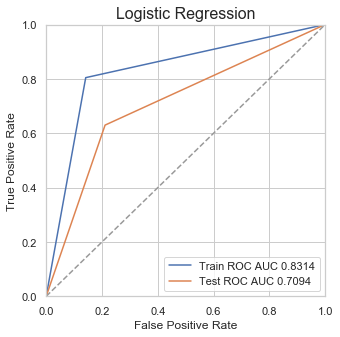

In [272]:
fpr_train, tpr_train, thresholds_train = roc_curve(y_1_train, logistic.predict(X_1_train))
fpr_test, tpr_test, thresholds_test = roc_curve(y_1_test, logistic.predict(X_1_test))

plt.rcParams['figure.figsize'] = (5.0, 5.0)
plt.plot(fpr_train, tpr_train, label='Train ROC AUC {0}'.format(roc_auc_train_l))
plt.plot(fpr_test, tpr_test, label='Test ROC AUC {0}'.format(roc_auc_test_l))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression', size=16)
plt.legend(loc='lower right')
plt.show()

In [273]:
#from sklearn.feature_selection import RFE

In [274]:
#rfe = RFE(logistic.fit(X_1_train, y_1_train), 10)
#fit = rfe.fit(X_1_train, y_1_train)
#features_bool = np.array(fit.support_)

#features_LR = np.array(X_1_train.columns)

#result = features_LR[features_bool]
#print(result)
#print(features_bool)

In [275]:
from sklearn.metrics import confusion_matrix

In [276]:
y_test_predict_LR = logistic.predict_proba(X_1_test)[:, 1]

In [277]:
confusion_matrix_LR = confusion_matrix(y_1_test, y_test_predict_LR.round())
print('LR', confusion_matrix_LR)

LR [[329  88]
 [114 194]]


In [278]:
from sklearn.metrics import classification_report

In [279]:
print('LR', classification_report(y_1_test, y_test_predict_LR.round()))

LR               precision    recall  f1-score   support

           0       0.74      0.79      0.77       417
           1       0.69      0.63      0.66       308

    accuracy                           0.72       725
   macro avg       0.72      0.71      0.71       725
weighted avg       0.72      0.72      0.72       725



##### 2. Используем метод градиентного бустинга

In [280]:
import xgboost

In [281]:
xgb = xgboost.XGBClassifier(max_depth=20)

In [282]:
xgb.fit(X_1_train, y_1_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [283]:
roc_auc_train_x = np.round(roc_auc_score(y_1_train, xgb.predict(X_1_train)), 4)
print(roc_auc_train_x)
roc_auc_test_x = np.round(roc_auc_score(y_1_test, xgb.predict(X_1_test)), 4)
print(roc_auc_test_x)

0.9019
0.7702


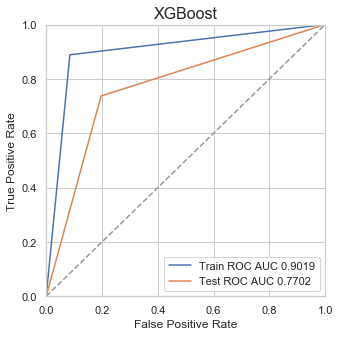

In [284]:
fpr_train, tpr_train, thresholds_train = roc_curve(y_1_train, xgb.predict(X_1_train))
fpr_test, tpr_test, thresholds_test = roc_curve(y_1_test, xgb.predict(X_1_test))

plt.rcParams['figure.figsize'] = (5.0, 5.0)
plt.plot(fpr_train, tpr_train, label='Train ROC AUC {0}'.format(roc_auc_train_x))
plt.plot(fpr_test, tpr_test, label='Test ROC AUC {0}'.format(roc_auc_test_x))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost', size=16)
plt.legend(loc='lower right')
plt.show()

In [285]:
y_test_predict_X = xgb.predict_proba(X_1_test)[:, 1]

In [286]:
confusion_matrix_x = confusion_matrix(y_1_test, y_test_predict_X.round())
print('XGB', confusion_matrix_x)

XGB [[335  82]
 [ 81 227]]


In [287]:
print('XGB', classification_report(y_1_test, y_test_predict_X.round()))

XGB               precision    recall  f1-score   support

           0       0.81      0.80      0.80       417
           1       0.73      0.74      0.74       308

    accuracy                           0.78       725
   macro avg       0.77      0.77      0.77       725
weighted avg       0.78      0.78      0.78       725



In [288]:
g = 'gain'
gain=xgb.get_booster().get_score(importance_type= g)

In [289]:
sorted_gain =sorted(gain.items(), key=lambda x: x[1], reverse=True)[:10]
print(sorted_gain)

[('Group_partner_rabota_> 18 rd', 43.83379589803787), ('Partner_ООО "УРАЛХИМ-ТРАНС"', 12.37631357858297), ('Step_partner_2_group_step', 11.034184958690705), ('Group_partner_rabota_11-18 rd', 10.857515703045589), ('Author_Казанцева Елена Владимировна', 5.28631475673359), ('Author_Бородулина Мария Владимировна', 4.194672780269231), ('Author_Волкова Ирина Борисовна', 3.6773960987272742), ('Author_Исупова Марина Юрьевна', 3.676873071119047), ('Author_Белоногова Татьяна Владимировна', 3.508112960605555), ('Author_Кетова Александра Владимировна', 3.5046035492525016)]


In [290]:
df_agg_c[df_agg_c['Partner_HITECH GRAND PRIX LIMITED'] == 0].groupby(['Flag']).count()['ID contract']

Flag
0    3990
1    3253
Name: ID contract, dtype: int64

In [291]:
df_agg_c[df_agg_c['Partner_HITECH GRAND PRIX LIMITED'] == 1].groupby(['Flag']).count()['ID contract']

Flag
0    6
1    1
Name: ID contract, dtype: int64

In [292]:
c = 'cover'
cover = xgb.get_booster().get_score(importance_type =c)
sorted_cover=sorted(cover.items(), key = lambda x: x[1], reverse=True)[:10]
print(sorted_cover)

[('Author_Сафонова Наталья Александровна', 827.8982916111113), ('Author_Умпелев Дмитрий Олегович', 811.6245355652172), ('Author_Полуян Евгения Алексеевна', 802.502014), ('Author_Лекомцева Елизавета Владимировна', 796.1946562500001), ('Direction_Служба маркетинга', 796.1279706666666), ('Author_Родионова Евгения Владиславовна', 793.787971375), ('Partner_ООО "КЗГО" 86743', 785.8252766666666), ('Author_Игушева Екатерина Георгиевна', 783.3981568000002), ('Profile_Оценочная деятельность', 779.9453308), ('Profile_Оказание информационных услуг', 771.1073)]


In [293]:
df_agg_c[df_agg_c['Partner_WUTRA  FORDERTECHNIK GMBH'] == 0].groupby(['Flag']).count()['ID contract']

Flag
0    3990
1    3253
Name: ID contract, dtype: int64

In [294]:
df_agg_c[df_agg_c['Partner_WUTRA  FORDERTECHNIK GMBH'] == 1].groupby(['Flag']).count()['ID contract']

Flag
0    6
1    1
Name: ID contract, dtype: int64

In [295]:
w = 'weight'
weight=xgb.get_booster().get_score(importance_type=w)
sorted_weight=sorted(weight.items(), key = lambda x: x[1], reverse=True)[:10]
print(sorted_weight)

[('Partner_2step_quant_3-5 rd', 539), ('Profile_Договоры, заключаемые по результатам конкурентных процедур', 476), ('Step_partner_1_group_step', 463), ('ZNP_bin', 451), ('Author_rabota_quant_11-16 rd', 448), ('Month_new_March', 438), ('Month_new_December', 437), ('Month_new_February', 380), ('Month_new_September', 378), ('Month_new_April', 376)]


In [296]:
df_agg_c[df_agg_c['Partner_2step_quant_2 rd'] == 0].groupby(['Flag']).count()['ID contract']

Flag
0    3290
1    2798
Name: ID contract, dtype: int64

In [297]:
df_agg_c[df_agg_c['Partner_2step_quant_2 rd'] == 1].groupby(['Flag']).count()['ID contract']

Flag
0    706
1    456
Name: ID contract, dtype: int64

In [298]:
tg = 'total_gain'
t_gain = xgb.get_booster().get_score(importance_type=tg)
sorted_tg=sorted(t_gain.items(), key = lambda x: x[1], reverse=True)[:10]
print(sorted_tg)

[('Group_partner_rabota_> 18 rd', 4777.883752886128), ('Group_partner_rabota_11-18 rd', 2486.37109599744), ('Step_partner_2_group_step', 1390.3073047950288), ('Partner_2step_quant_>5 rd', 988.7397532883399), ('Step_author_1_group_step', 759.6735288624502), ('Partner_2step_quant_0-1 rd', 675.7370044026799), ('Group_partner_rabota_0-4 rd', 553.0061780709798), ('Month_new_September', 485.3392572664202), ('Profile_Договоры, заключаемые по результатам конкурентных процедур', 453.90929665997044), ('Step_partner_0_group_step', 437.74976444867)]


In [299]:
df_agg_c[df_agg_c['Author_Самарина Марина Александровна'] == 0].groupby(['Flag']).count()['ID contract']

Flag
0    3966
1    3245
Name: ID contract, dtype: int64

In [300]:
df_agg_c[df_agg_c['Author_Самарина Марина Александровна'] == 1].groupby(['Flag']).count()['ID contract']

Flag
0    30
1     9
Name: ID contract, dtype: int64

In [301]:
tc = 'total_cover'
t_cover = xgb.get_booster().get_score(importance_type=tc)
sorted_tc=sorted(t_cover.items(), key = lambda x: x[1], reverse=True)[:10]
print(sorted_tc)

[('Group_partner_rabota_> 18 rd', 59969.814838640006), ('Group_partner_rabota_0-4 rd', 41717.60136397999), ('Partner_2step_quant_>5 rd', 38749.400614390026), ('Group_partner_rabota_11-18 rd', 36716.22270547), ('Step_partner_0_group_step', 34777.260345400005), ('Author_Рязанов Александр Евгеньевич', 23304.36553889), ('Author_Колчина Дарина Александровна', 22905.61019800001), ('Author_Самарина Марина Александровна', 22444.8047183), ('Author_Гилева Светлана Ивановна', 19983.40003261), ('Step_author_1_group_step', 19472.55935071999)]


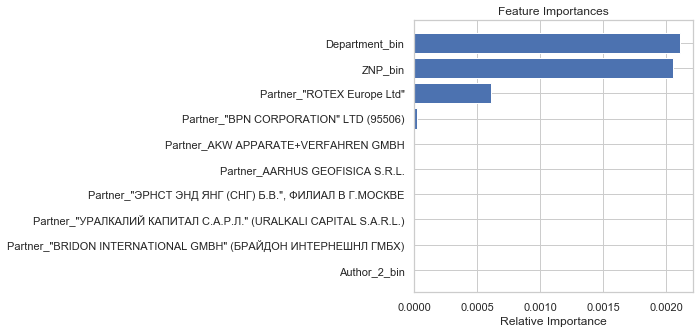

In [302]:
features = X_1_train.columns
importances = xgb.feature_importances_[:10]

indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Выводы

In [303]:
import shap

In [304]:
shap_values_XGB_train = shap.TreeExplainer(xgb).shap_values(X_1_train)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


auto_size_plot=False is depricated and is now ignored! Use plot_size=None instead.


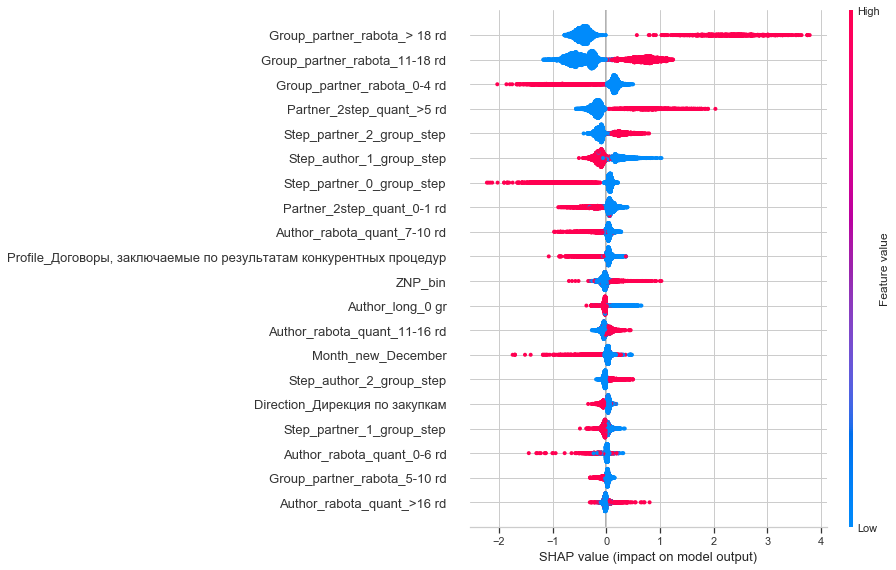

In [305]:
shap.summary_plot(shap_values_XGB_train, X_1_train, max_display=20, auto_size_plot=True)

Убрали признак ZNP_bin

In [306]:
X_1_train.drop('ZNP_bin', axis=1, inplace = True)
X_1_test.drop('ZNP_bin', axis=1, inplace = True)

In [307]:
xgb.fit(X_1_train, y_1_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [308]:
roc_auc_train_x = np.round(roc_auc_score(y_1_train, xgb.predict(X_1_train)), 4)
print(roc_auc_train_x)
roc_auc_test_x = np.round(roc_auc_score(y_1_test, xgb.predict(X_1_test)), 4)
print(roc_auc_test_x)

0.8955
0.7686


In [309]:
y_test_predict_X = xgb.predict_proba(X_1_test)[:, 1]
confusion_matrix_x = confusion_matrix(y_1_test, y_test_predict_X.round())
print('XGB', confusion_matrix_x)

XGB [[331  86]
 [ 79 229]]


In [310]:
print('XGB', classification_report(y_1_test, y_test_predict_X.round()))

XGB               precision    recall  f1-score   support

           0       0.81      0.79      0.80       417
           1       0.73      0.74      0.74       308

    accuracy                           0.77       725
   macro avg       0.77      0.77      0.77       725
weighted avg       0.77      0.77      0.77       725



In [311]:
g = 'gain'
gain=xgb.get_booster().get_score(importance_type= g)
sorted_gain =sorted(gain.items(), key=lambda x: x[1], reverse=True)[:10] # применили поиск максимального значения
print(sorted_gain)

[('Group_partner_rabota_> 18 rd', 43.443023314303154), ('Group_partner_rabota_11-18 rd', 11.493560483006084), ('Partner_ООО "УРАЛХИМ-ТРАНС"', 11.136872180930556), ('Step_partner_2_group_step', 9.036216800661778), ('Author_Казанцева Елена Владимировна', 5.403447450359458), ('Author_Исупова Марина Юрьевна', 4.222984397633332), ('Author_Кетова Александра Владимировна', 3.8123561016944456), ('Author_Бородулина Мария Владимировна', 3.720920919078572), ('Partner_ФГАОУ ВО " УРФУ ИМЕНИ ПЕРВОГО ПРЕЗИДЕНТА РОССИИ Б.Н. ЕЛЬЦИНА"', 3.544518945), ('Group_partner_rabota_0-4 rd', 3.5056940626730957)]


In [312]:
c = 'cover'
cover = xgb.get_booster().get_score(importance_type =c)
sorted_cover=sorted(cover.items(), key = lambda x: x[1], reverse=True)[:10]
print(sorted_cover)

[('Author_Кузнецова Ольга Сергеевна', 896.3879131428573), ('Author_Лекомцева Елизавета Владимировна', 872.3116249999999), ('Author_Умпелев Дмитрий Олегович', 857.2714122272727), ('Profile_Оценочная деятельность', 846.3200207777778), ('Profile_Дополнения к осн. договору', 838.9091683125), ('Partner_АО "АЛЬФАСТРАХОВАНИЕ", ПЕРМСКИЙ ФИЛИАЛ', 834.544759), ('Author_Сафонова Наталья Александровна', 816.39746875), ('Author_Шерстобитова Анна Владимировна', 812.170715), ('Partner_ООО "КОМЬЮНИТИ"', 809.3132671428572), ('Profile_Оказание услуг по организации деловых поездок (бронирование билетов и т.д)', 808.4260602857142)]


In [313]:
w = 'weight'
weight=xgb.get_booster().get_score(importance_type=w)
sorted_weight=sorted(weight.items(), key = lambda x: x[1], reverse=True)[:10]
print(sorted_weight)

[('Partner_2step_quant_3-5 rd', 543), ('Author_rabota_quant_11-16 rd', 480), ('Step_partner_1_group_step', 472), ('Profile_Договоры, заключаемые по результатам конкурентных процедур', 448), ('Month_new_March', 431), ('Month_new_December', 402), ('Month_new_April', 399), ('Partner_2step_quant_2 rd', 379), ('Partner_2step_quant_0-1 rd', 375), ('Month_new_February', 374)]


In [314]:
tg = 'total_gain'
t_gain = xgb.get_booster().get_score(importance_type=tg)
sorted_tg=sorted(t_gain.items(), key = lambda x: x[1], reverse=True)[:10]
print(sorted_tg)

[('Group_partner_rabota_> 18 rd', 4778.732564573347), ('Group_partner_rabota_11-18 rd', 2436.6348223972896), ('Step_partner_2_group_step', 1355.4325200992666), ('Partner_2step_quant_>5 rd', 1019.469988109631), ('Step_author_1_group_step', 802.65351357201), ('Partner_2step_quant_0-1 rd', 648.7885790679097), ('Group_partner_rabota_0-4 rd', 588.9566025290801), ('Step_partner_0_group_step', 448.05046401429973), ('Month_new_September', 434.5059943966904), ('Profile_Договоры, заключаемые по результатам конкурентных процедур', 414.51547995120677)]


In [315]:
tc = 'total_cover'
t_cover = xgb.get_booster().get_score(importance_type=tc)
sorted_tc=sorted(t_cover.items(), key = lambda x: x[1], reverse=True)[:10]
print(sorted_tc)

[('Group_partner_rabota_> 18 rd', 58828.78185738998), ('Group_partner_rabota_0-4 rd', 44942.61683350002), ('Group_partner_rabota_11-18 rd', 41210.09162734), ('Partner_2step_quant_>5 rd', 33704.361799110025), ('Step_partner_0_group_step', 33470.36849076), ('Author_Колчина Дарина Александровна', 23165.057894), ('Author_Рязанов Александр Евгеньевич', 22979.961177269997), ('Author_Гилева Светлана Ивановна', 22546.059535700002), ('Step_author_1_group_step', 21584.834592529995), ('Month_new_December', 20239.61917534001)]


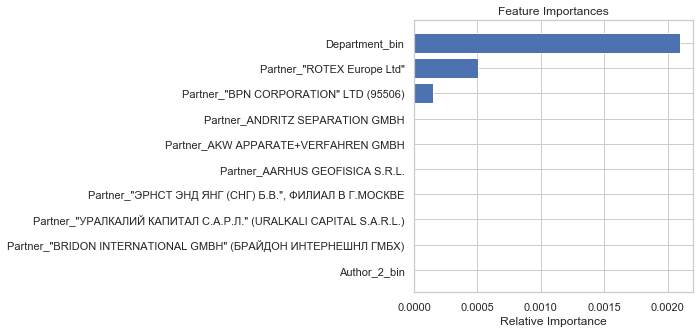

In [316]:
features = X_1_train.columns
importances = xgb.feature_importances_[:10]

indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Setting feature_perturbation = "tree_path_dependent" because no background data was given.
auto_size_plot=False is depricated and is now ignored! Use plot_size=None instead.


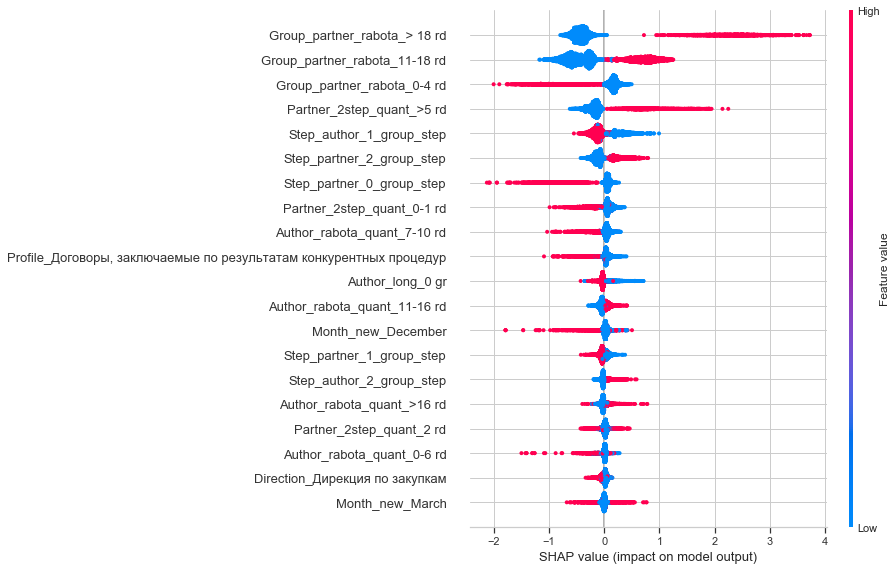

In [317]:
shap_values_XGB_train = shap.TreeExplainer(xgb).shap_values(X_1_train)
shap.summary_plot(shap_values_XGB_train, X_1_train, max_display=20, auto_size_plot=True)